# Formation RNAseq CEA - juin 2024

*Enseignantes: Sandrine Caburet et Claire Vandiedonck*

Session IFB : 5 CPU + 21 GB de RAM

# Part 07b:  Introduction to R - part B :
## *Graphics and stats with R*

    I. Some basic plotting
    II. Statistics
    III. Practicals
        Exercice 1 - représentation graphique de données qualitatives
        Exercice 2 - représentation graphique de la distribution d'une variable quantitative continue
        Exercice 3 facultatif - lois de probabilité
        Exercice 4 facultatif - représentation graphique de données quantitatives
        Exercice 5 - tests de comparaison de moyennes, impact de la différence entre les moyennes et de la variance, tests multiples
        Exercice 6 - un exemple d'analyse statistique de données

___
---

## **0 - Initializing the session**
---

### 0.1 - Setting up this R session on IFB core cluster

<em>loaded JupyterLab</em> : Version 3.5.0

In [1]:
## Code cell 1 ##

session_parameters <- function(){
    
    jupytersession <- c(system('echo "=== Cell launched on $(date) ==="', intern = TRUE),
                        system('squeue -hu $USER', intern = TRUE))
    
    jobid <- system("squeue -hu $USER | awk '/sys/dash {print $1}'", intern = TRUE)
    jupytersession <- c(jupytersession,
                        "=== Current IFB session size: Medium (5CPU, 21 GB) ===",
                        system(paste("sacct --format=JobID,AllocCPUS,ReqMem,NodeList,Elapsed,State -j", jobid), intern = TRUE))
    print(jupytersession[1:6])
    
    return(invisible(NULL))
}

session_parameters()

[1] "=== Cell launched on Thu Jun 20 12:18:01 CEST 2024 ==="                         
[2] "          40292652      fast sys/dash scaburet  R       6:20      1 cpu-node-51"
[3] "=== Current IFB session size: Medium (5CPU, 21 GB) ==="                         
[4] "JobID         AllocCPUS     ReqMem        NodeList    Elapsed      State "      
[5] "------------ ---------- ---------- --------------- ---------- ---------- "      
[6] "40292652              7        33G     cpu-node-51   00:06:20    RUNNING "      


In [2]:
## Code cell 2 ##   

cat("Voici mon environnement de travail avec les paquets de R chargés:\n")
sessionInfo()

Voici mon environnement de travail avec les paquets de R charg<U+00E9>s:


R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /shared/ifbstor1/software/miniconda/envs/r-4.2.3/lib/libopenblasp-r0.3.21.so

locale:
[1] C

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

loaded via a namespace (and not attached):
 [1] fansi_1.0.6       crayon_1.5.2      digest_0.6.35     utf8_1.2.4       
 [5] IRdisplay_1.1     repr_1.1.7        lifecycle_1.0.4   jsonlite_1.8.8   
 [9] evaluate_0.23     pillar_1.9.0      rlang_1.1.3       cli_3.6.2        
[13] uuid_1.2-0        vctrs_0.6.5       IRkernel_1.3.2    tools_4.2.3      
[17] glue_1.7.0        fastmap_1.2.0     compiler_4.2.3    base64enc_0.1-3  
[21] pbdZMQ_0.3-11     htmltools_0.5.8.1

---

### 0.2 - Parameters to be set or modified by the user


- Using a full path with a `/` at the end, **define the folder** of the project as  `gohome` variable, and the folder where you work as the `myfolder` variable:

In [3]:
## Code cell 3 ##


gohome <- "/shared/projects/2413_rnaseq_cea/"
gohome

# In a Jupyter Hub and a jupyter notebook in R, by default the working directory is where the notebook is opened
getwd()
myfolder <- getwd()
myfolder


[1] "/shared/projects/2413_rnaseq_cea/"

[1] "/shared/ifbstor1/projects/2413_rnaseq_cea/scaburet"

[1] "/shared/ifbstor1/projects/2413_rnaseq_cea/scaburet"

- With a `/` at the end, define the path to the Rintro folder where the input data and the results of this notebook will be stored:

In [4]:
## Code cell 4 ##

# storing the path to this folder in a variable
rintrofolder <- paste0(myfolder,"/Results/Rintro/", sep = "")
rintrofolder

# listing the content of the folder
print(system(paste("ls -hlt", rintrofolder), intern = TRUE) )

[1] "/shared/ifbstor1/projects/2413_rnaseq_cea/scaburet/Results/Rintro/"

[1] "total 4.0K"                                                    
[2] "-rw-rw----+ 1 scaburet scaburet 384 Jun 15 13:35 myDataf.RData"


- Last, we specify the size of the graphical outputs that will be used for all the plots in the notebook.    
This setting could be modified at will for each plot. 

In [5]:
## Code cell 5 ##

options(repr.plot.width=10, repr.plot.height=10)

### 0.3 - Loading data from the previous session

In [6]:
## Code cell 6 ##

rdata <- paste0(rintrofolder,"myDataf.RData")
rdata
load(rdata,verbose = T)

[1] "/shared/ifbstor1/projects/2413_rnaseq_cea/scaburet/Results/Rintro/myDataf.RData"

Loading objects:
  myDataf


We can now list all the object we have currently in our session: 

In [7]:
## Code cell 7 ##

ls() 

[1] "gohome"             "myDataf"            "myfolder"          
[4] "rdata"              "rintrofolder"       "session_parameters"

**Great!!**. All is set now to play with "R base" to plot some graphics and perform statistics.

___
---

## **I - Some basic plots**
---

R is a fanstatic tool to draw nice graphs: https://r-graph-gallery.com/ and https://www.data-to-viz.com/. A great package, **ggplot2**, allows to draw the nicest plots.

We could spend several sessions on the topic but let's have a quick view of what can be done with **R base** commands on our dataframe.

#### **a. Scatter plot with the function `plot()`**

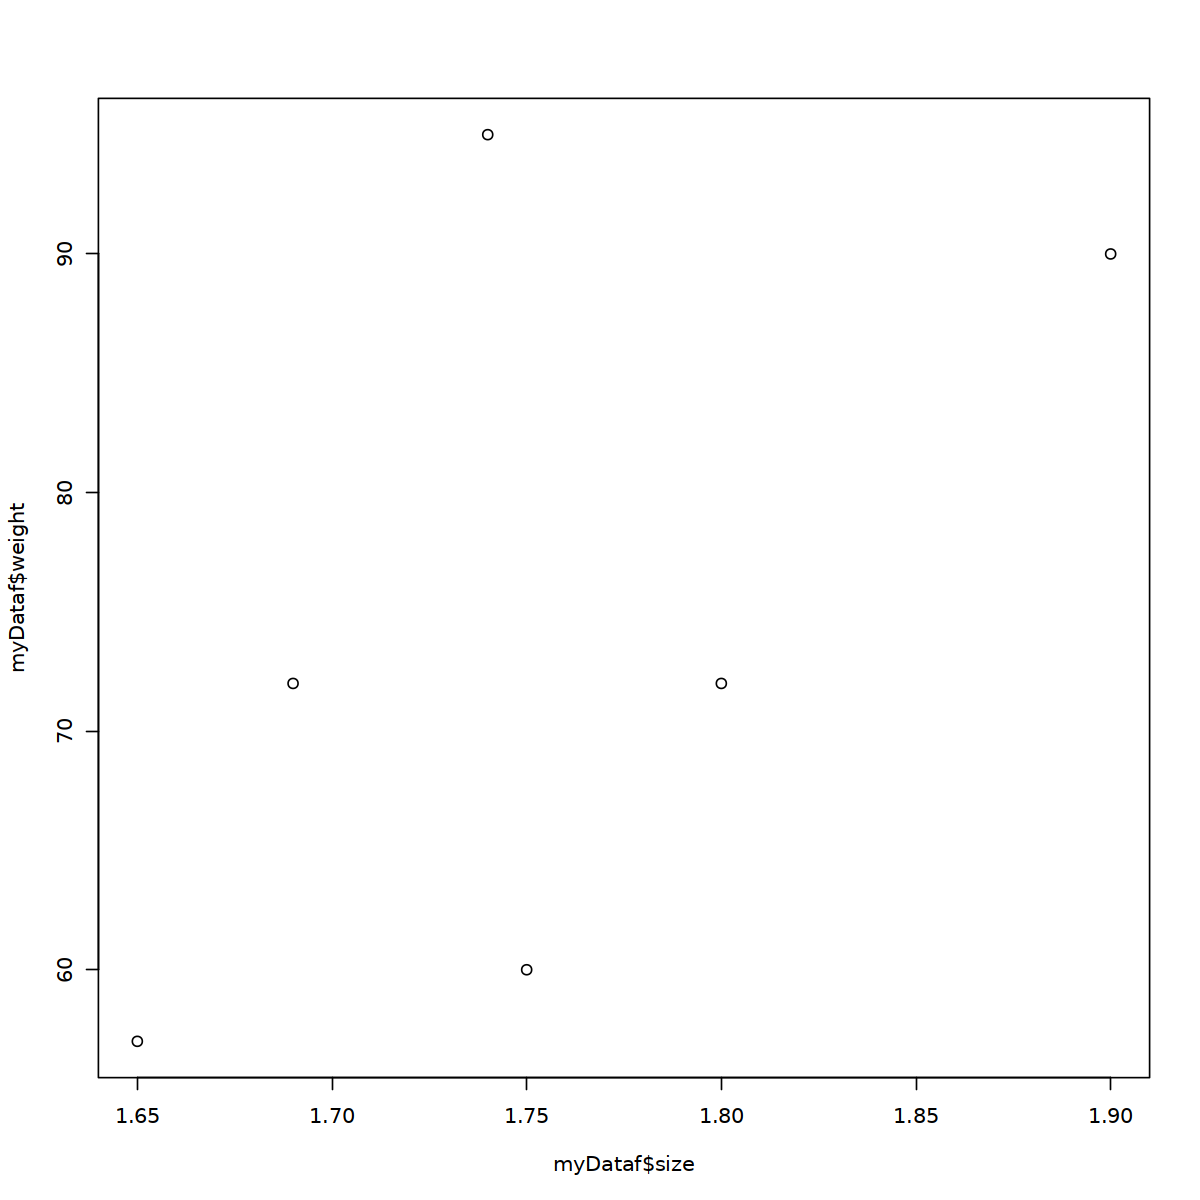

In [8]:
## Code cell n°8 ##

plot(myDataf$weight ~ myDataf$size)  

#### **b. Representation of quantitative data distribution:** 

- as a boxplot with `boxplot()`:

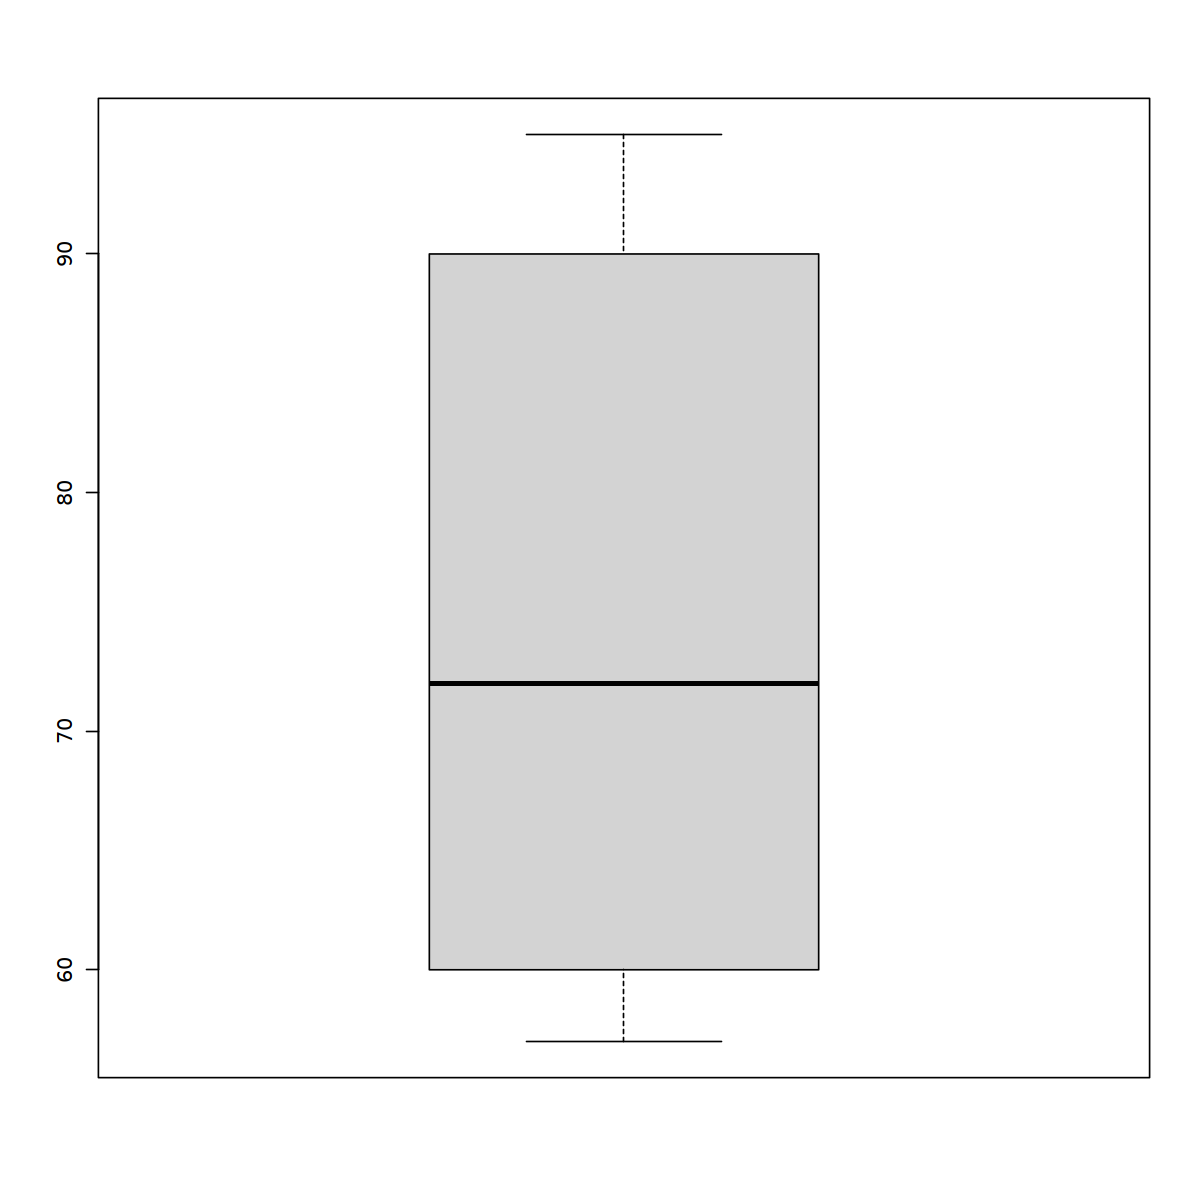

In [9]:
## Code cell n°9 ##

boxplot(myDataf$weight)

or using `~ ` to display boxplots on the same plot depending on a categorical variable:

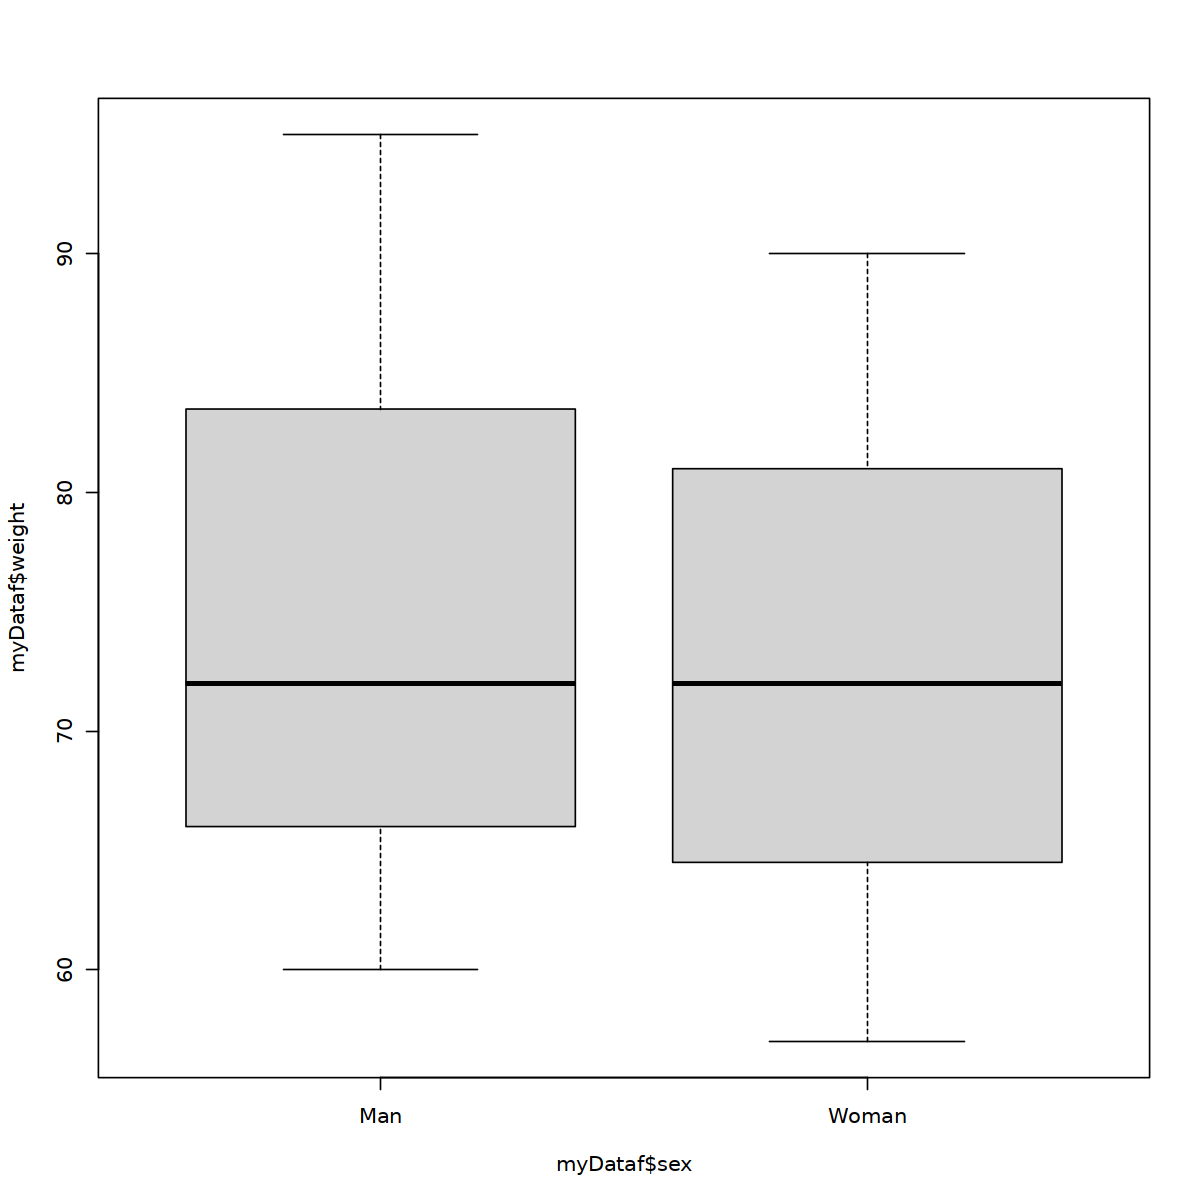

In [10]:
## Code cell n°10 ##

boxplot(myDataf$weight ~ myDataf$sex) 

- as a histogram with `hist()`:

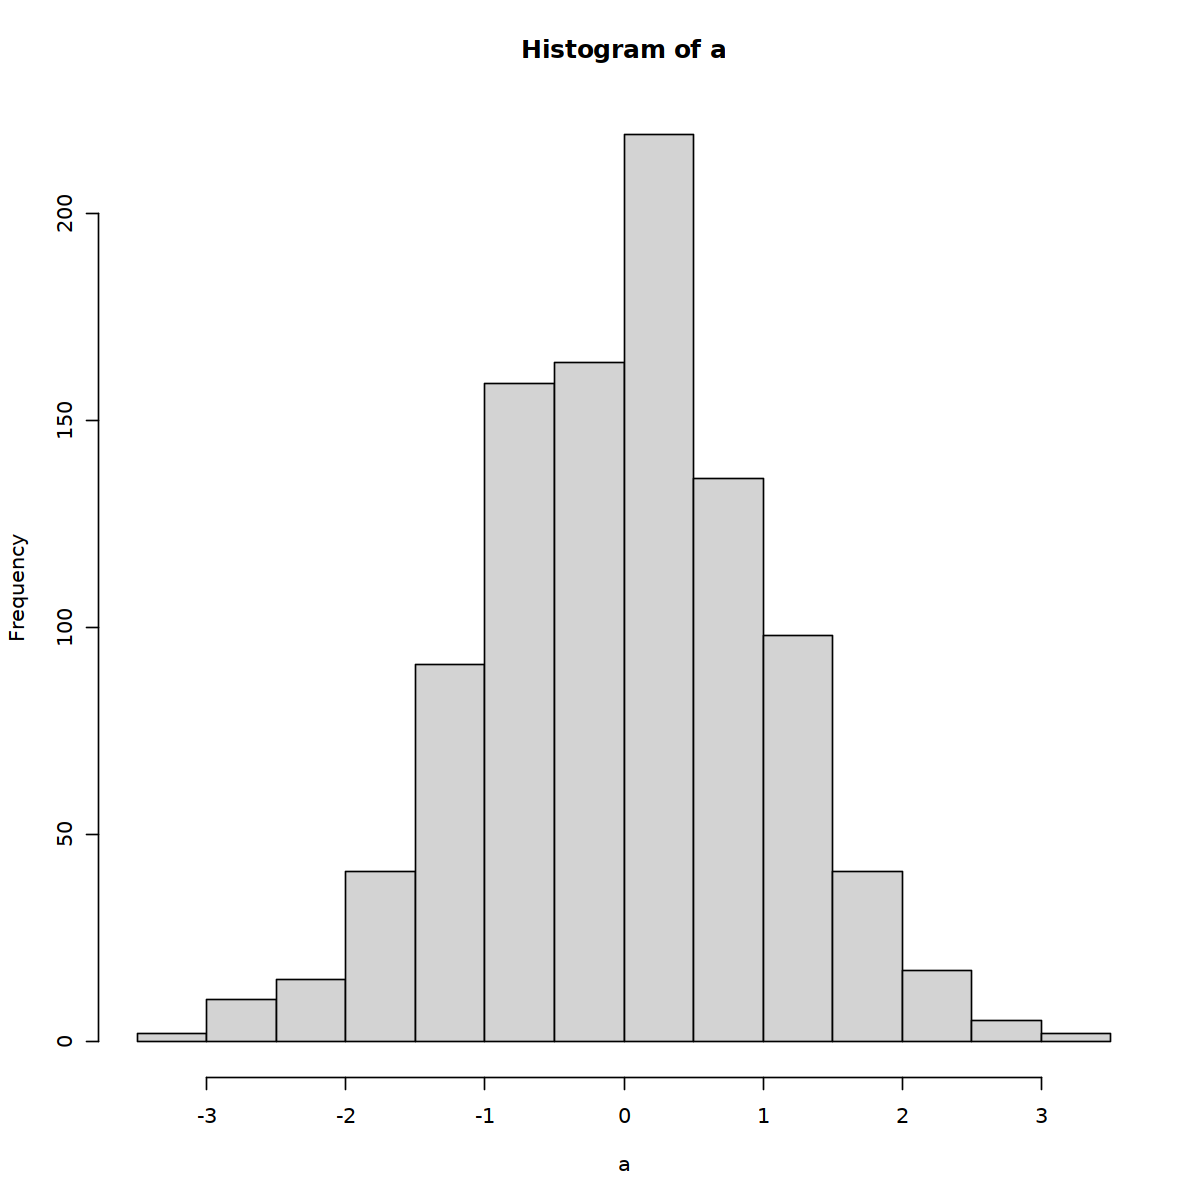

In [11]:
## Code cell n°11 ##

a <- rnorm(1000) # to sample 1000 values from a normal distribution of mean 0 and standard deviation 1
hist(a, breaks = 20) # the argument breaks is used to specify the number of intervals

- **customize graphs**

<div class="alert alert-block alert-info"><b><u>Graphs have three-level functions:</u></b>

1. <b>primary graph functions</b> like `plot()`, `boxplot` and `hist()` to display the principal graph types in R

2. <b>secondary graph functions</b> to complement an existing plot like `points()`, `lines()`, `legend()` or `title()` to display principal graph elements in R. In a notebook, use them in the same cell.

3. <b>graphical parameters</b> to modify the plots display:
    - either as options of the primary and secondary functions
    - or permanetly with the `par()` function before plotting the graph.</div>


Below is an example using primary and secondary functions:

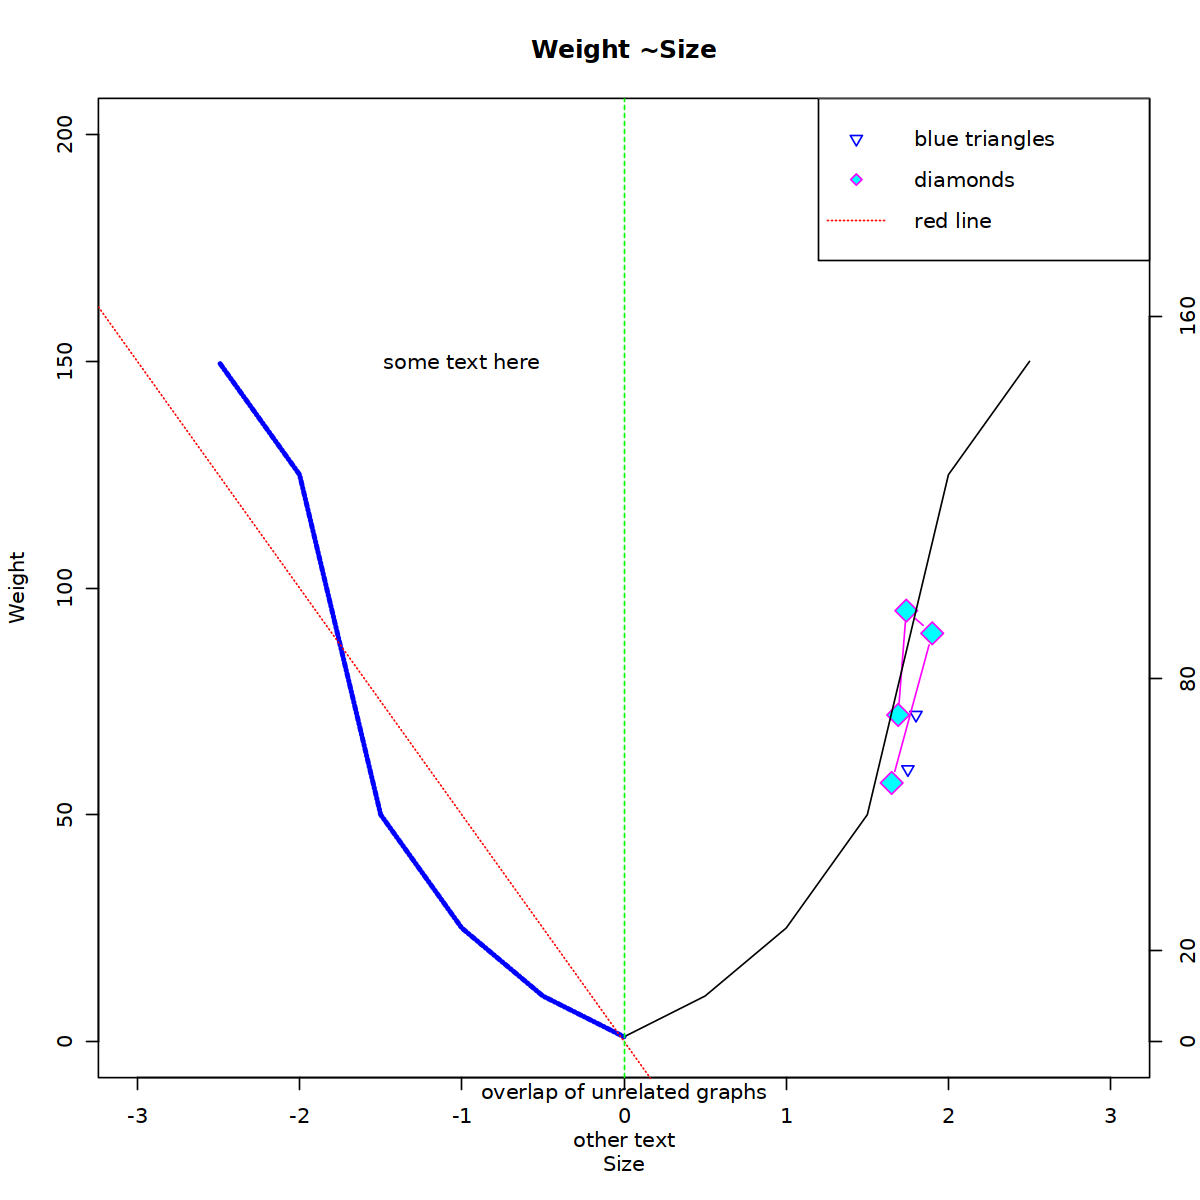

In [14]:
## Code cell n°12 ##

plot(myDataf$weight ~ myDataf$size,   # this is a primary function
     main = "Weight ~Size", 
     xlim = c(-3,3),
     ylim = c(0,200),
     type = "n",
     xlab = "Size",
     ylab = "Weight")
points(myDataf$weight[1:2] ~ myDataf$size[1:2], # this is a secondary function
       pch = 6,                                 # this is a parameter of the points() function: pch = plot character, i.e shape of the points.  6 is a downward pointing triangle
       col = "blue")
points(myDataf[3:6,"weight"] ~ myDataf$size[3:6],
       type = "b",
       pch = 23,
       col = "magenta",
       bg = "cyan",
       cex = 2)
points(seq(0, 2.5, 0.5),
       c(1, 10, 25, 50, 125, 150),
       type = "l") 
lines(-seq(0, 2.5, 0.5),
      c(1, 10, 25, 50, 125, 150),
      lty = "dotdash",
      col = "blue",
      lwd = 3) 
abline(0, -50,
       lty = 3,
       col = "red")
abline(v = 0,
       lty = 2,
       col = "green")

mtext("overlap of unrelated graphs",
      side = 1)
mtext("other text",
      side = 1,
      line = 2)
text(-1, 150,
     "some text here")
axis(side = 4,
     labels = c(0, 20, 80, 160),
     at = c(0, 20, 80, 160),
     tick = TRUE)
legend("topright",
       c("blue triangles", "diamonds", "red line"),
       pch = c(6, 23, NA),
       col = c("blue", "magenta", "red"),
       pt.bg = c("transparent", "cyan", "transparent"),
       lty = c(0,0,3))

- **saving graphs**

Save figures in different formats with the appropriate function (by default they will be saved in the working directory)
<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">function</th>
    <th class="tg-0pky">extension file</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">bmp()</td>
    <td class="tg-0pky">.bmp</td>
  </tr>
  <tr>
    <td class="tg-0pky">jpeg()</td>
    <td class="tg-0pky">.jpeg</td>
  </tr>
  <tr>
    <td class="tg-0pky">tiff()</td>
    <td class="tg-0pky">.tiff</td>
  </tr>
  <tr>
    <td class="tg-0pky">png()</td>
    <td class="tg-0pky">.png</td>
  </tr>
  <tr>
    <td class="tg-0pky">postscript()</td>
    <td class="tg-0pky">.eps</td>
  </tr>
  <tr>
    <td class="tg-0pky">pdf()</td>
    <td class="tg-0pky">.pdf</td>
  </tr>
</tbody>
</table>

***Three steps***
1. Type the *saving* function with the name of the saved file as an argument with the correct extension. Other arguments like « width » and « height » can be used to specify dimensions.
2. Do your plot -> it is directed to the file and not displayed in the graphical window within R
3. Close the graph by typing the `dev.off()` function

> Specific case for `pdf()`: you may save each figure at a time or all several (all) figures generated with all the command lines entered between `pdf()` and `dev.off()`.

---
---
## **II - Statistics with R**
___

R is a dedicated language to perform statistics including descriptive statistics and statistical tests.

- for **descriptive statistics** you may use the `summary()` function:

In [15]:
### Code cell n°13 ##

summary(myDataf)

     weight           size            bmi            sex           
 Min.   :57.00   Min.   :1.650   Min.   :19.59   Length:6          
 1st Qu.:63.00   1st Qu.:1.702   1st Qu.:21.26   Class :character  
 Median :72.00   Median :1.745   Median :23.58   Mode  :character  
 Mean   :74.33   Mean   :1.755   Mean   :24.04                     
 3rd Qu.:85.50   3rd Qu.:1.788   3rd Qu.:25.14                     
 Max.   :95.00   Max.   :1.900   Max.   :31.38                     
     index     
 Min.   :1.00  
 1st Qu.:2.25  
 Median :3.50  
 Mean   :3.50  
 3rd Qu.:4.75  
 Max.   :6.00  

- for **statistical tests**

Let's start with a t test with the function `t.test` that compares means of a quantitative variable between 2 groups.

In [16]:
## Code cell n°14 ##

t.test(myDataf$weight ~ myDataf$sex) 


	Welch Two Sample t-test

data:  myDataf$weight by myDataf$sex
t = 0.19026, df = 3.9785, p-value = 0.8584
alternative hypothesis: true difference in means between group Man and group Woman is not equal to 0
95 percent confidence interval:
 -36.33073  41.66406
sample estimates:
  mean in group Man mean in group Woman 
           75.66667            73.00000 


<div class="alert alert-block alert-info"><b><u>To interpret the test, look at the p-value.</u></b>  <br> If it is below the alpha risk, then you can reject the null hypothesis</div>
    
In the example above, it is not significant at 5%: the null hypothesis could not be rejected. 

Let's now perform a Chi square test with `chisq.test()` that compares distributions of qualitative variables.

For the example, let's consider a contingency table with counts of genotypes obtained in 2 groups, one with patients and one with controls.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0pky">genotype</th>
    <th class="tg-0pky">cases</th>
    <th class="tg-0pky">controls</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">0/0</td>
    <td class="tg-0pky">188</td>
    <td class="tg-0pky">94</td>
  </tr>
  <tr>
    <td class="tg-0pky">1/0 (or 0/1)<br></td>
    <td class="tg-0pky">133<br></td>
    <td class="tg-0pky">92</td>
  </tr>
  <tr>
    <td class="tg-0pky">1/1<br></td>
    <td class="tg-0pky">24</td>
    <td class="tg-0pky">30</td>
  </tr>
</tbody>
</table>

In [16]:
## Code cell n°15 ##

cases_controls <- data.frame("genotype" = c("0/0", "1/0 (or 0/1)","1/1"),
                             "cases" = c(188,133,24),
                             "controls" = c(94,92,30))

In [18]:
## Code cell n°16 ##

cases_controls

genotype,cases,controls
<chr>,<dbl>,<dbl>
0/0,188,94
1/0 (or 0/1),133,92
1/1,24,30


We can compute the observed frequencies with the function `proportions`...

In [19]:
## Code cell n°17 ##

proportions(as.matrix(cases_controls[,2:3]),2)

cases,controls
0.54492754,0.4351852
0.38550725,0.4259259
0.06956522,0.1388889


...and display these proportions in a stacked barplot:

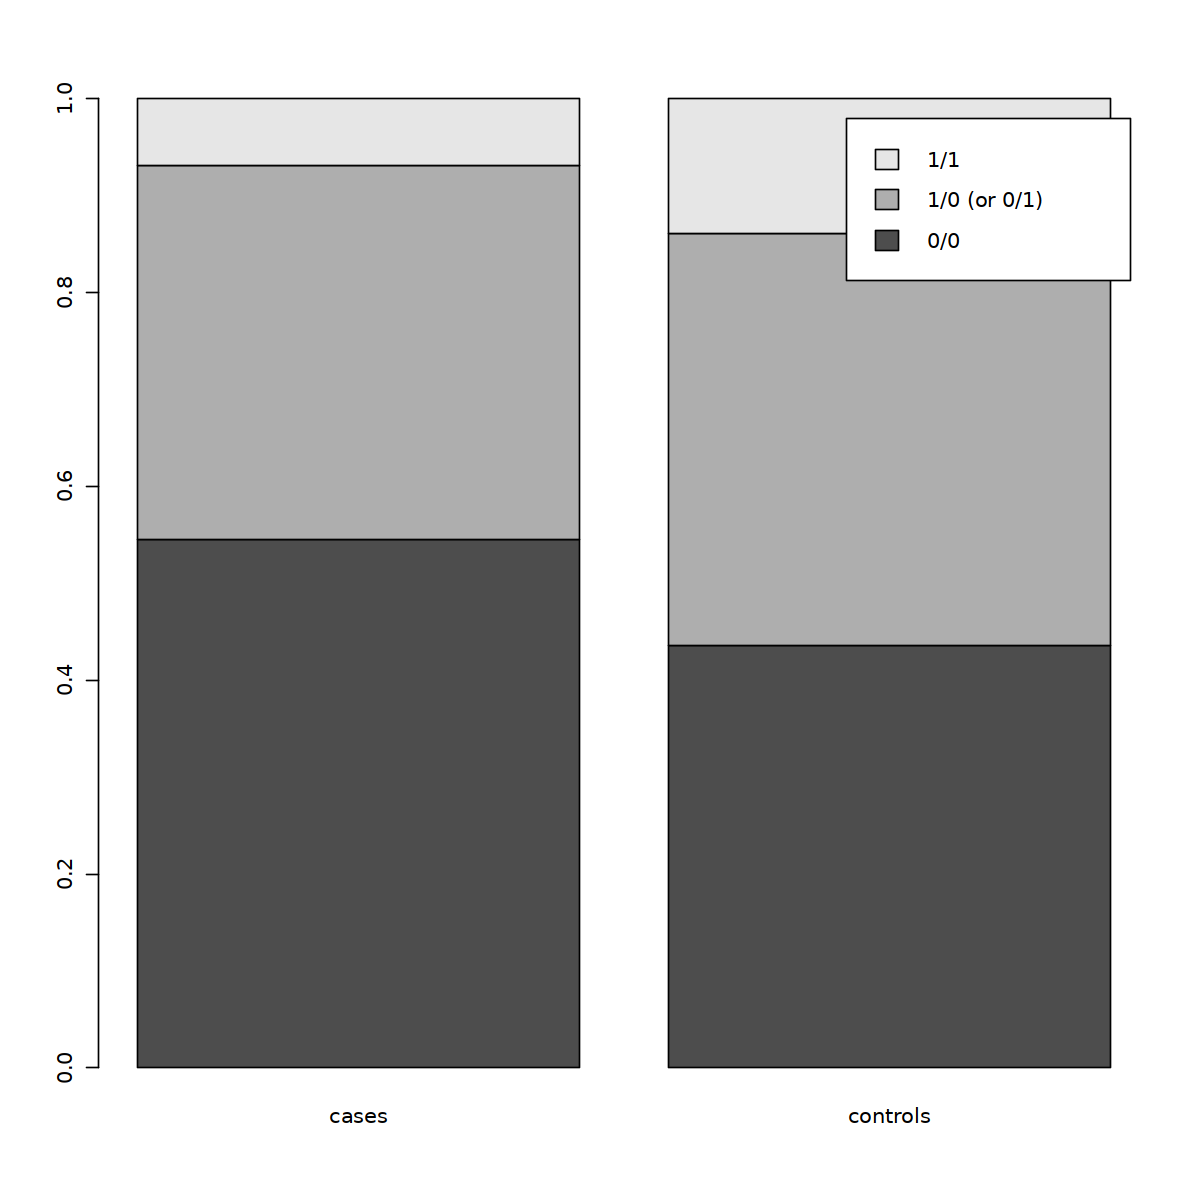

In [20]:
## Code cell n°18 ##

barplot(proportions(as.matrix(cases_controls[,2:3]),2),
        beside = FALSE,
        legend = cases_controls$genotype)

Let's now test whether these proportions differ between cases and controls with a Chi square test:

In [21]:
## Code cell n°19 ##

chisq.test(cases_controls[, 2:3]) 


	Pearson's Chi-squared test

data:  cases_controls[, 2:3]
X-squared = 10.356, df = 2, p-value = 0.005641


This time the pvalue is below 5%, we can reject the null hypothesis of equal frequencies. 

---
---
## **III - Practicals**
___


### Exercice 1: représentation graphique de données qualitatives
---

Importez dans R le fichier `motorisation.txt` qui est dans le répertoire partagé accessible en lecture dans notre projet dans : `/shared/projects/2413_rnaseq_cea/alldata/Example_Data` et sur google drive : https://drive.google.com/file/d/1u1DgGk5HiqWi5IsHz-Sx8INkKbfWvIP9/view?usp=drive_link

L'objectif de cet exercice est d'étudier la distribution des différents types de motorisations de véhicules.

- Importez le fichier dans R avec la fonction `read.table()` sous la forme d'un dataframe que vous appelerez `motorisation`.

Avant de lire ce fichier et de l'assigner dans un objet R, ouvrez-le avec un éditeur de texte pour voir s'il y a une en-tête, combien il contient de lignes, de colonnes et quel est leur séparateur (espace, tabulation, virgule, point virgule, etc...)<br>
Ici `motorisation.txt` est un fichier texte de 22 lignes, avec une seule colonne (donc vous pouvez garder le séparateur de champs "espace" par défaut dans la commande read.table), et sans en-tête (donc il faut le spécifier avec l'argument "header" sinon votre première valeur serait lue comme un nom de colonne par défaut).


*__Tip :__* fonctions recommandées :
    `read.table()`,
    `str()`_

In [17]:
## Code cell n°20 ##

motorisation <- read.table(paste0('/shared/projects/2413_rnaseq_cea/alldata/Example_Data/motorisation.txt'), header = FALSE, stringsAsFactors = FALSE) # nommez votre objet R

- Toujours vérifier ensuite la structure des objets importés et se demander si elle est conforme à ce que vous souhaitez avec la fonction `str()`

In [18]:
## Code cell n°21 ##
str(motorisation)

'data.frame':	22 obs. of  1 variable:
 $ V1: chr  "Hybride" "Diesel" "Diesel" "Essence" ...


- Renommez la variable `V1` par `type_de_motorisation` en utilisant la fonction `names()`

In [19]:
## Code cell n°22 ##
names(motorisation) <- "type_de_motorisation"

- Générez un tableau de contingence avec la fonction `table()` comptant le nombre d'observations de chaque valeur de la variable "type de motorisation". Il s'agit d'un objet R à une seule dimension.

In [20]:
## Code cell n°23 ##
table(motorisation$type_de_motorisation)


    Diesel Electrique    Essence    Hybride 
         9          1          7          5 

In [21]:
## Code cell n°23.2 ##
# Si besoin, vous pouvez extraire les noms attribués à ces valeurs avec la commande
names(table(motorisation$type_de_motorisation))

[1] "Diesel"     "Electrique" "Essence"    "Hybride"

- Générez un camembert de la répartition des différentes motorisations.

*__Tip :__* fonctions recommandées :
    `pie()`,
    `table()`_

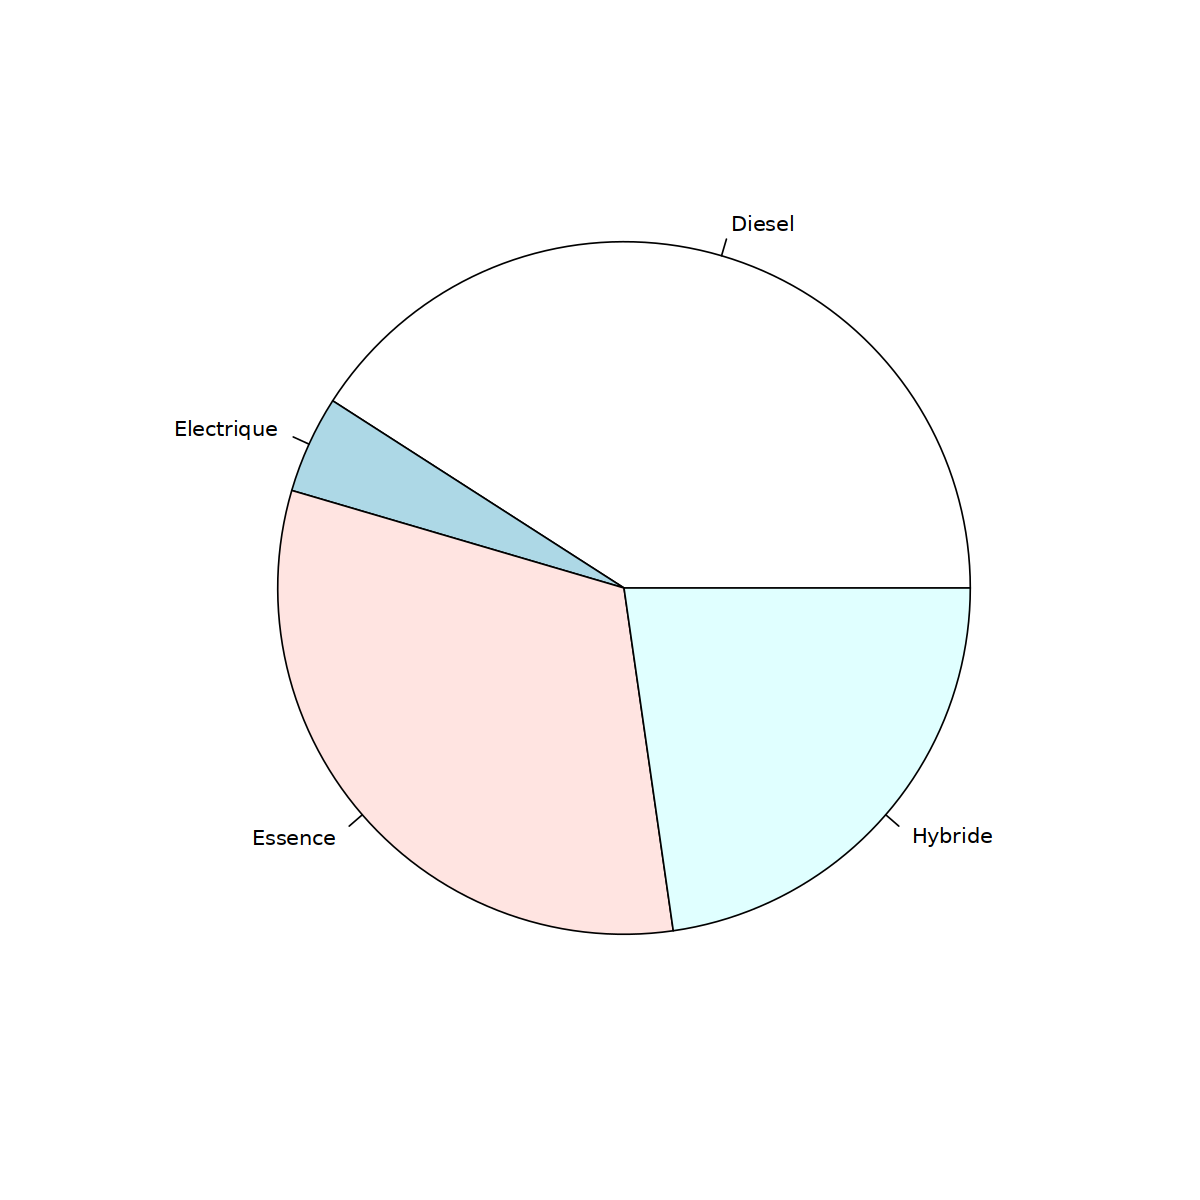

In [22]:
## Code cell n°24 ##
pie(table(motorisation$type_de_motorisation))

- Essayez de dessiner le même camembert en choisissant vous-mêmes des couleurs avec l'argument `col()` à partir des palettes de couleurs R (https://web.archive.org/web/20121202022815/http://research.stowers-institute.org/efg/R/Color/Chart/ColorChart.pdf)

*Si je choisis mes couleurs :*

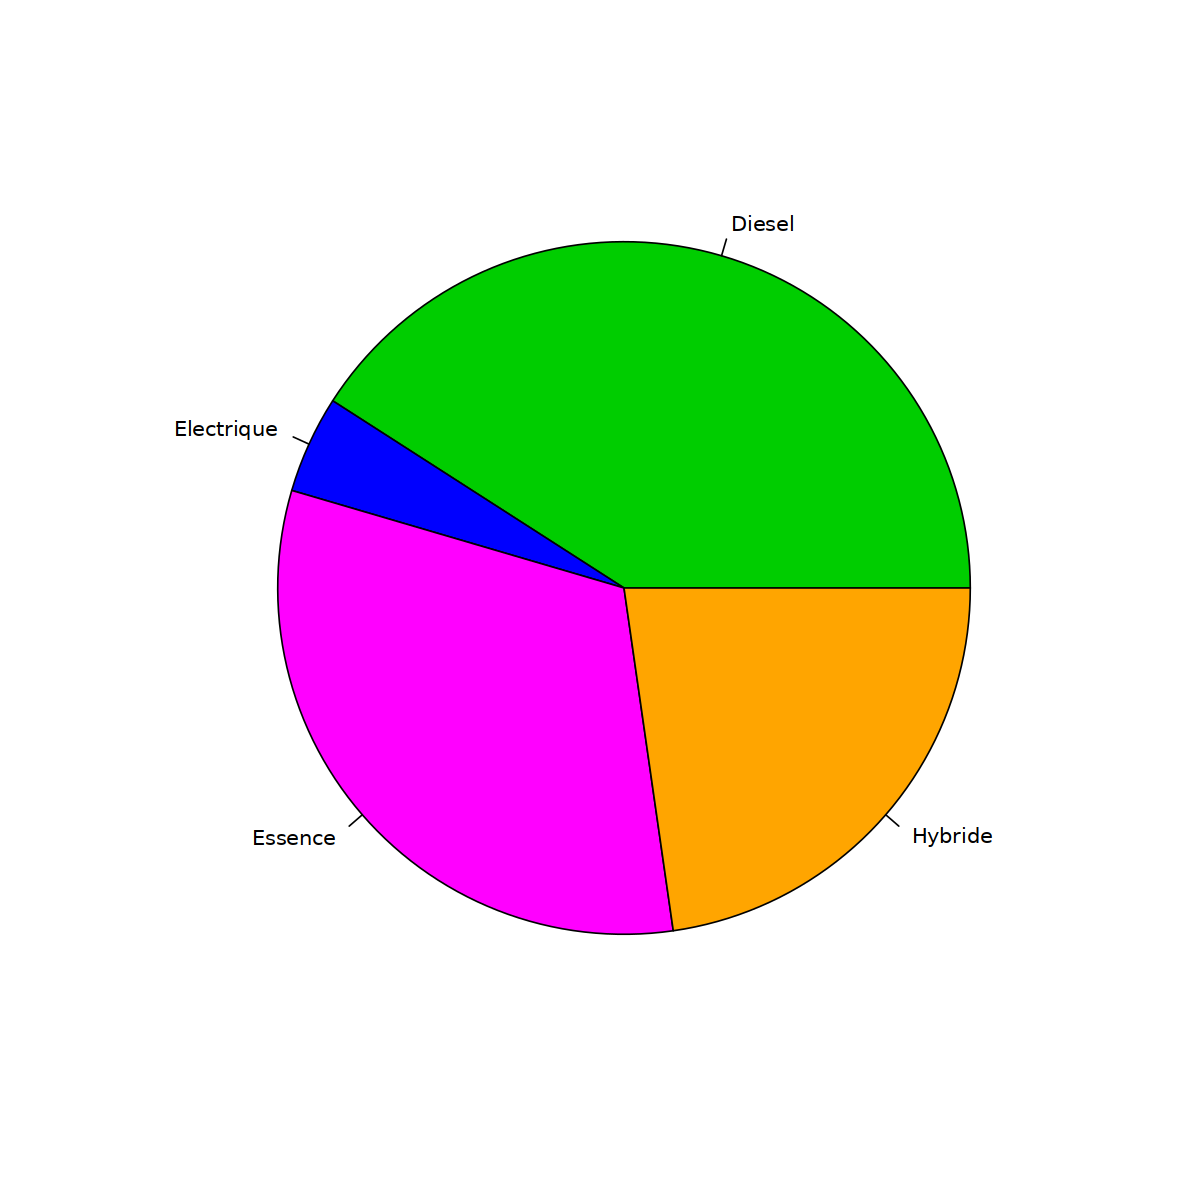

In [23]:
## Code cell n°25 ##
pie(table(motorisation$type_de_motorisation), col = c("green3","blue","magenta","orange"))

N’hésitez pas à décomposer la commande ci-dessus élement par élément pour bien la comprendre en tapant successivement:

In [24]:
## Code cell n°25.2 ##
?pie

pie {graphics},R Documentation
x,a vector of non-negative numerical quantities. The values in x are displayed as the areas of pie slices.
labels,"one or more expressions or character strings giving names for the slices. Other objects are coerced by as.graphicsAnnot. For empty or NA (after coercion to character) labels, no label nor pointing line is drawn."
edges,the circular outline of the pie is approximated by a polygon with this many edges.
radius,the pie is drawn centered in a square box whose sides range from -1 to 1. If the character strings labeling the slices are long it may be necessary to use a smaller radius.
clockwise,"logical indicating if slices are drawn clockwise or counter clockwise (i.e., mathematically positive direction), the latter is default."
init.angle,"number specifying the starting angle (in degrees) for the slices. Defaults to 0 (i.e., ‘3 o'clock’) unless clockwise is true where init.angle defaults to 90 (degrees), (i.e., ‘12 o'clock’)."
density,"the density of shading lines, in lines per inch. The default value of NULL means that no shading lines are drawn. Non-positive values of density also inhibit the drawing of shading lines."
angle,"the slope of shading lines, given as an angle in degrees (counter-clockwise)."
col,"a vector of colors to be used in filling or shading the slices. If missing a set of 6 pastel colours is used, unless density is specified when par(""fg"") is used."
"border, lty",(possibly vectors) arguments passed to polygon which draws each slice.


Alternativement: vous pouviez utiliser la commande `pie()` sans utiliser de tableau de contingence en donnant comme argument x un vecteur avec les comptes de chaque valeur comme ci-dessous : 

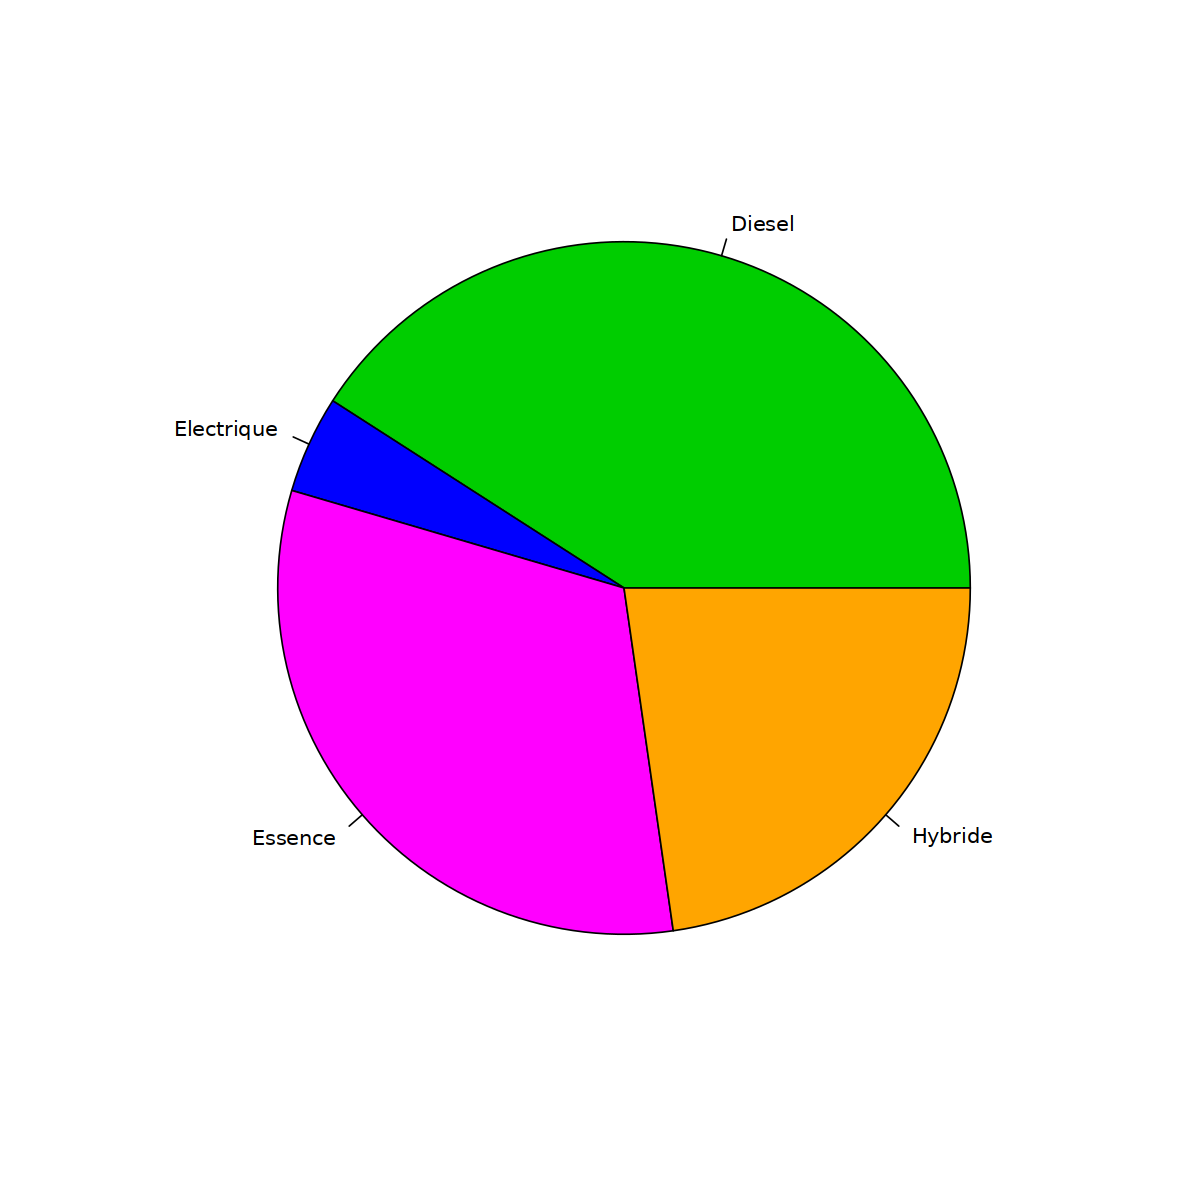

In [25]:
## Code cell n°25.3 ##
pie(c(9, 1, 7, 5), labels = c("Diesel","Electrique", "Essence", "Hybride"),
    col = c("green3","blue","magenta","orange"))

Vous pouvez ajouter l'argument clockwise=TRUE pour changer l'orientation des parts du camembert.   
Ici, j'ai écrit `labels=c("Diesel","Electrique", "Essence", "Hybride")` mais on aurait pu écrire egalement `labels = names(table(motorisation$type_de_motorisation))` ou `labels = sort(unique(motorisation$type_de_motorisation)` car `unique()` retourne chaque occurence/valeur possible de la variable et la fonction `sort()` les trie par ordre alphanumérique.

Enfin, si vous voulez afficher les parts du camembert par ordre croissant, vous pouvez appliquer la fonction `sort()` sur la valeur obtenue par la commande `(table(motorisation$type_de_motorisation))`.

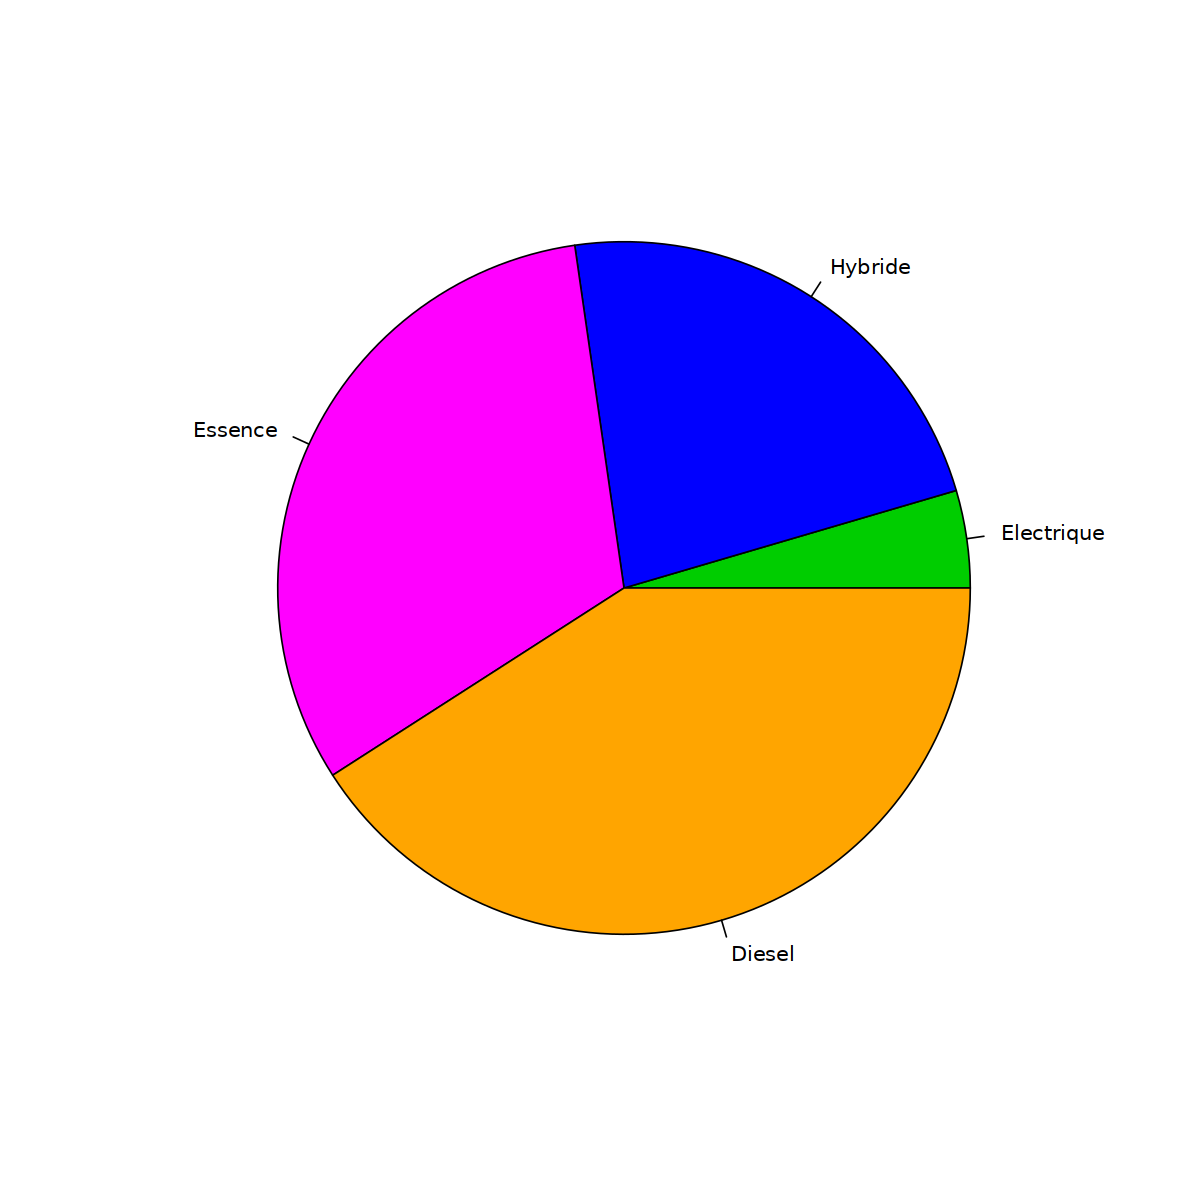

In [26]:
## Code cell n°25.4 ##
pie(sort(table(motorisation$type_de_motorisation)), col = c("green3","blue","magenta","orange")) # les couleurs sont attribuées dans le nouvel ordre...qui est peut etre mieux car diesel n'est plus en vert!

- Générez également un diagramme en bâtons avec les proportions (fréquences relatives) des différentes motorisations colorées comme dans le camembert.

*__Tip :__* fonctions recommandées :
    `table()`,
    `barplot()`_

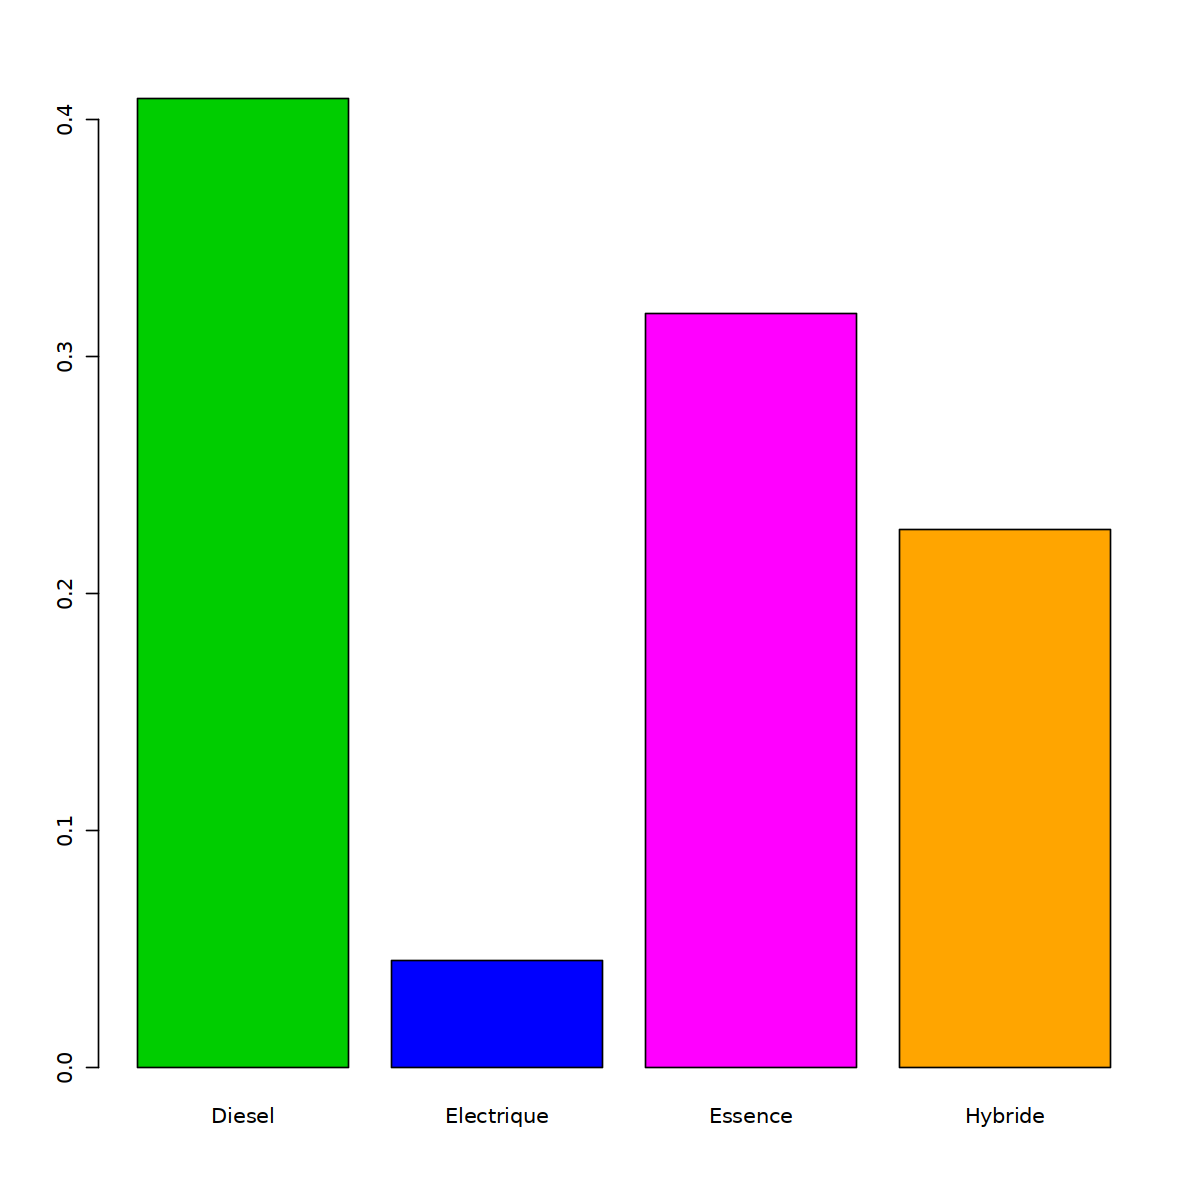

In [27]:
## Code cell n°26 ##
barplot(table(motorisation$type_de_motorisation)/length(motorisation$type_de_motorisation),
        col = c("green3","blue","magenta","orange"))

=> Il s'agit bien d'un barplot (diagramme en batons) adapté à des donnees qualitatives ou quantitatives discrètes et non d'un histogramme adapté à des variables continues

> N’hésitez pas à agrandir votre fenêtre d’affichage pour voir les noms sous les batons si vous êtes sur RStudio… ou ajustez leur taille en utilisant l’argument cex.names:

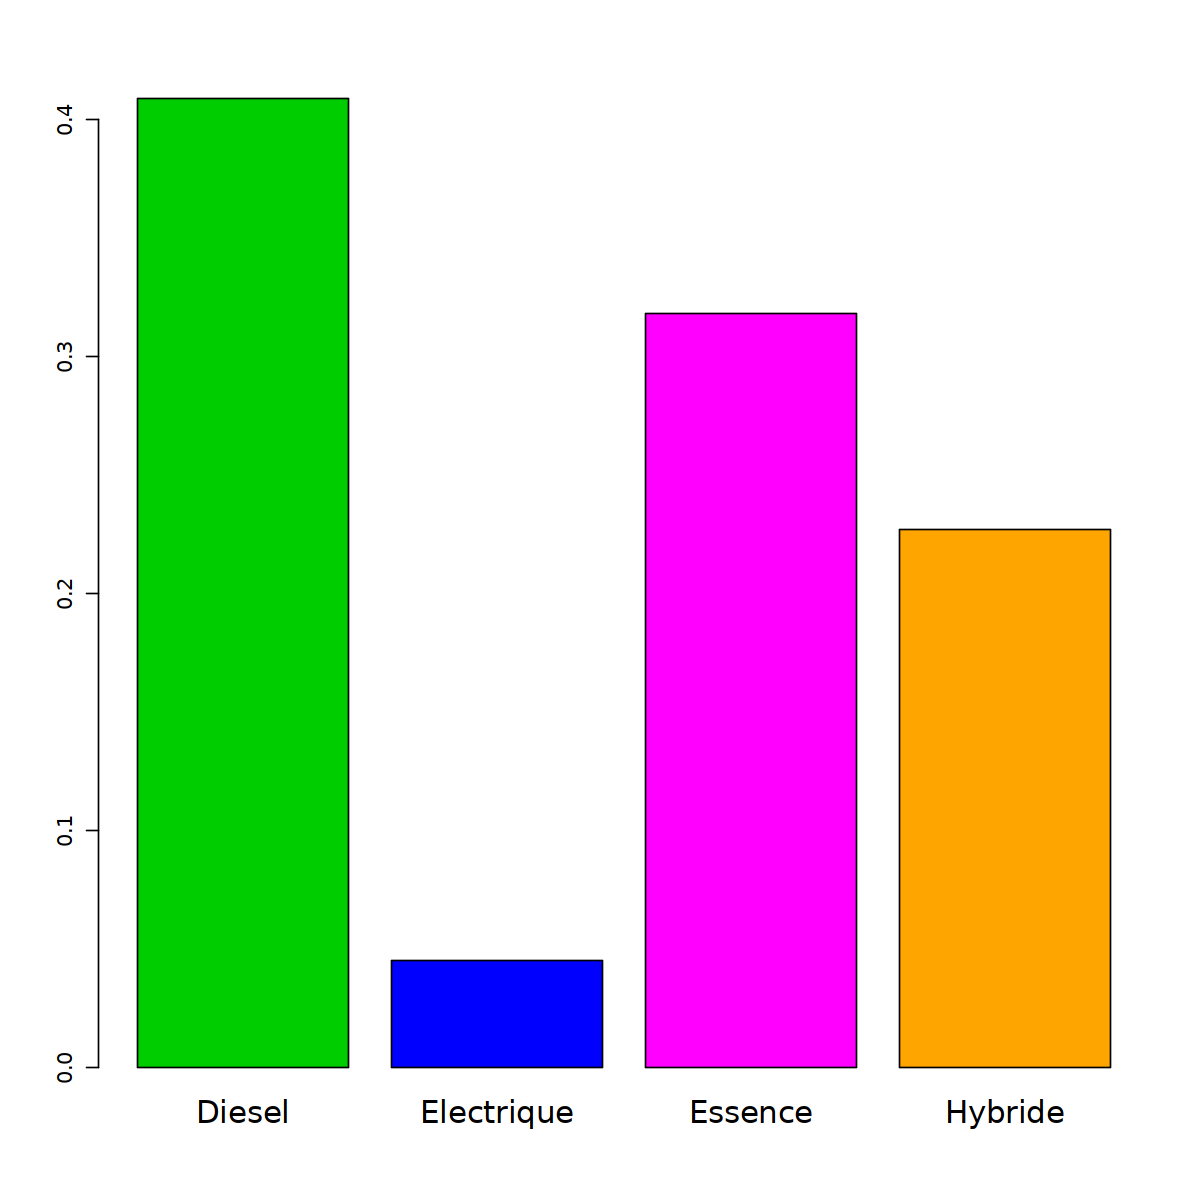

In [28]:
## Code cell n°26.2 ##
barplot(table(motorisation$type_de_motorisation)/length(motorisation$type_de_motorisation),
        cex.names = 1.5,
        col = c("green3","blue","magenta","orange"))

Il est aussi possible d’utiliser barplot avec une matrice comme argument `x`. Dans ce cas, par défaut avec l’argument `beside = FALSE`, les éléments du diagramme en baton seront empilés.

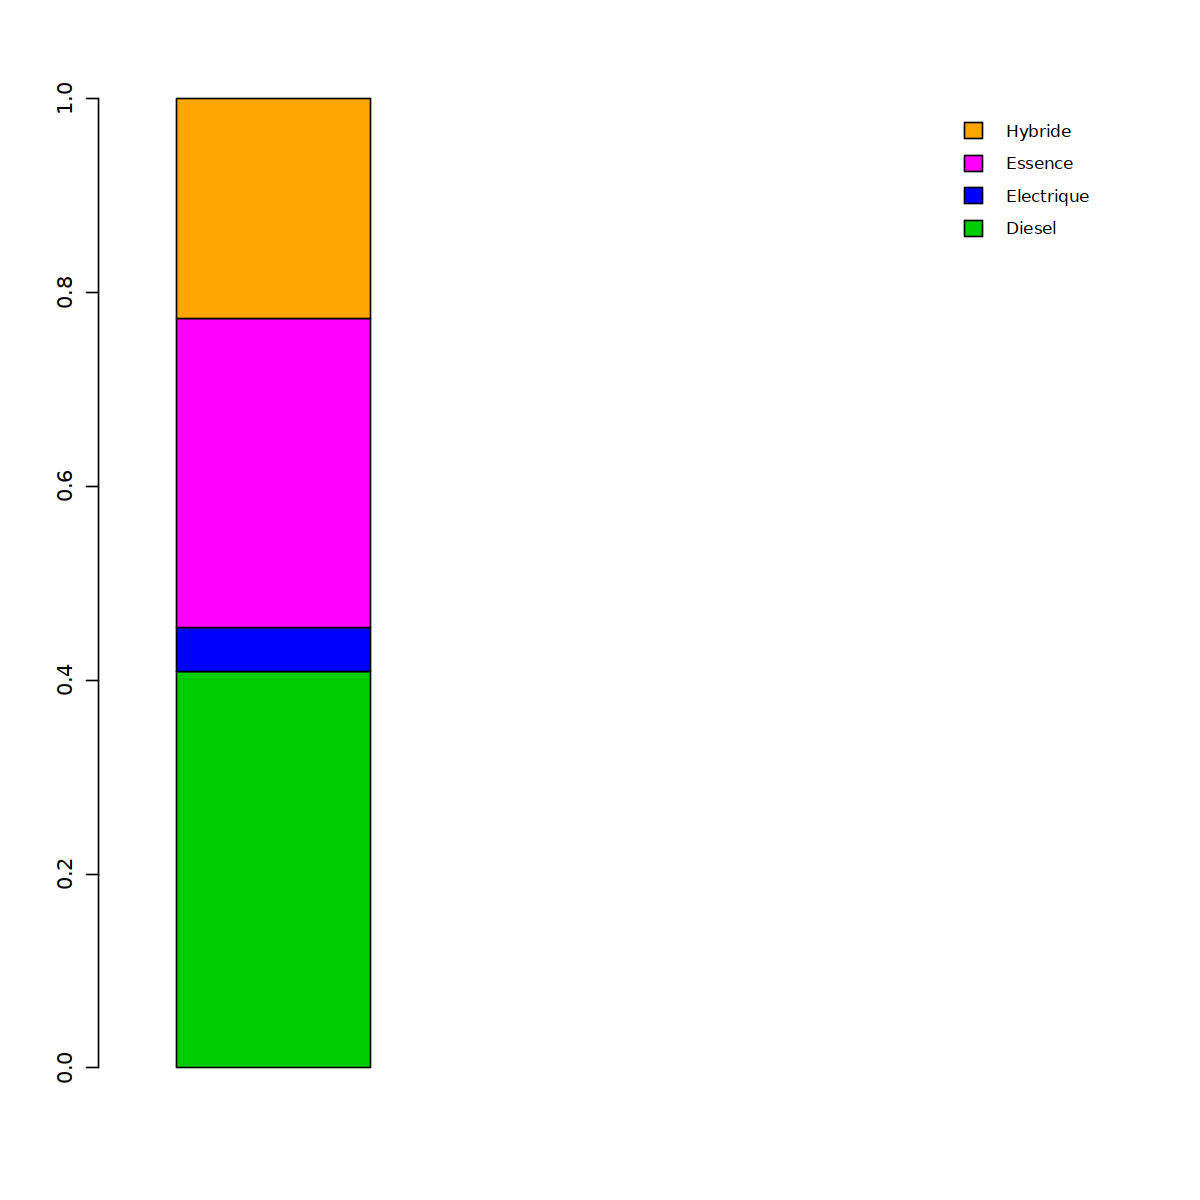

In [35]:
## Code cell n°26.3 ##
barplot(matrix(table(motorisation$type_de_motorisation)/length(motorisation$type_de_motorisation)),
        col = c("green3","blue","magenta","orange"),
        legend.text = unique(sort(motorisation$type_de_motorisation)),
        args.legend = list(x = "topright", cex = 0.8, bty = "n"),
        width = 1,
        xlim = c(0,5) )

Si vous voulez les afficher du plus grand au plus petit effectif, ajouter `sort()` en précisant `decreasing=T` (T = TRUE)

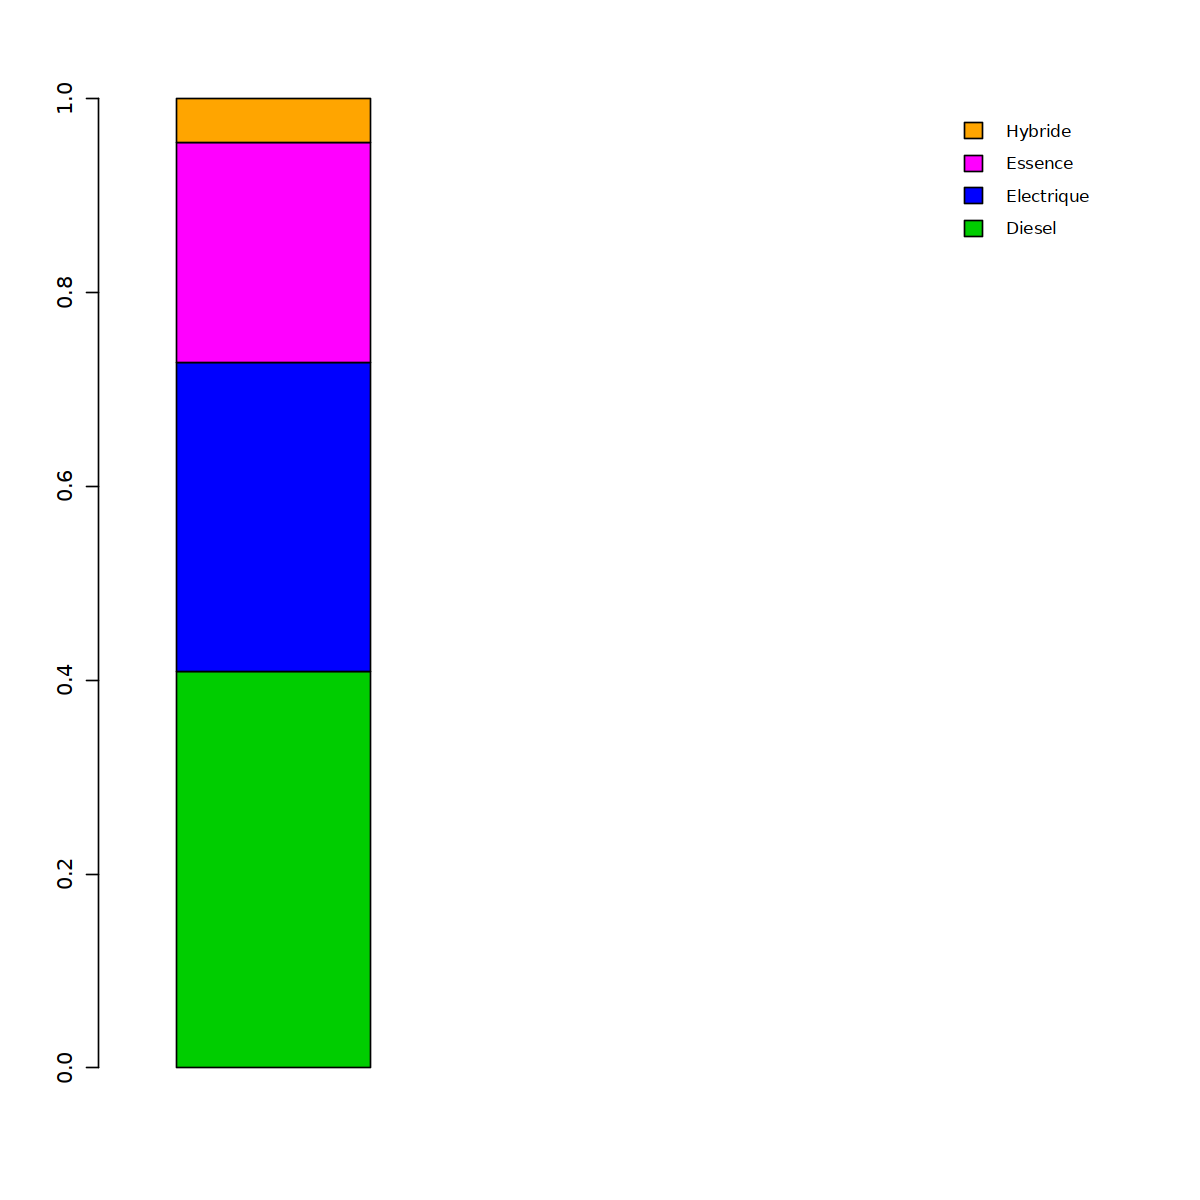

In [29]:
## Code cell n°26.4 ##
barplot(matrix(sort(table(motorisation$type_de_motorisation)/length(motorisation$type_de_motorisation),decreasing = T)),
        col = c("green3","blue","magenta","orange"),
        legend.text = unique(sort(motorisation$type_de_motorisation)),
        args.legend = list(x = "topright", cex = 0.8, bty = "n"),
        width = 1,
        xlim = c(0,5) )

- Avec la fonction `par()` que vous appellerez avant les deux commandes de chaque graphique, disposez les deux graphes côte à côte sur un même graphique.

*__Tip :__* fonctions recommandées :
    `par()`avec l’argument `mfrow`

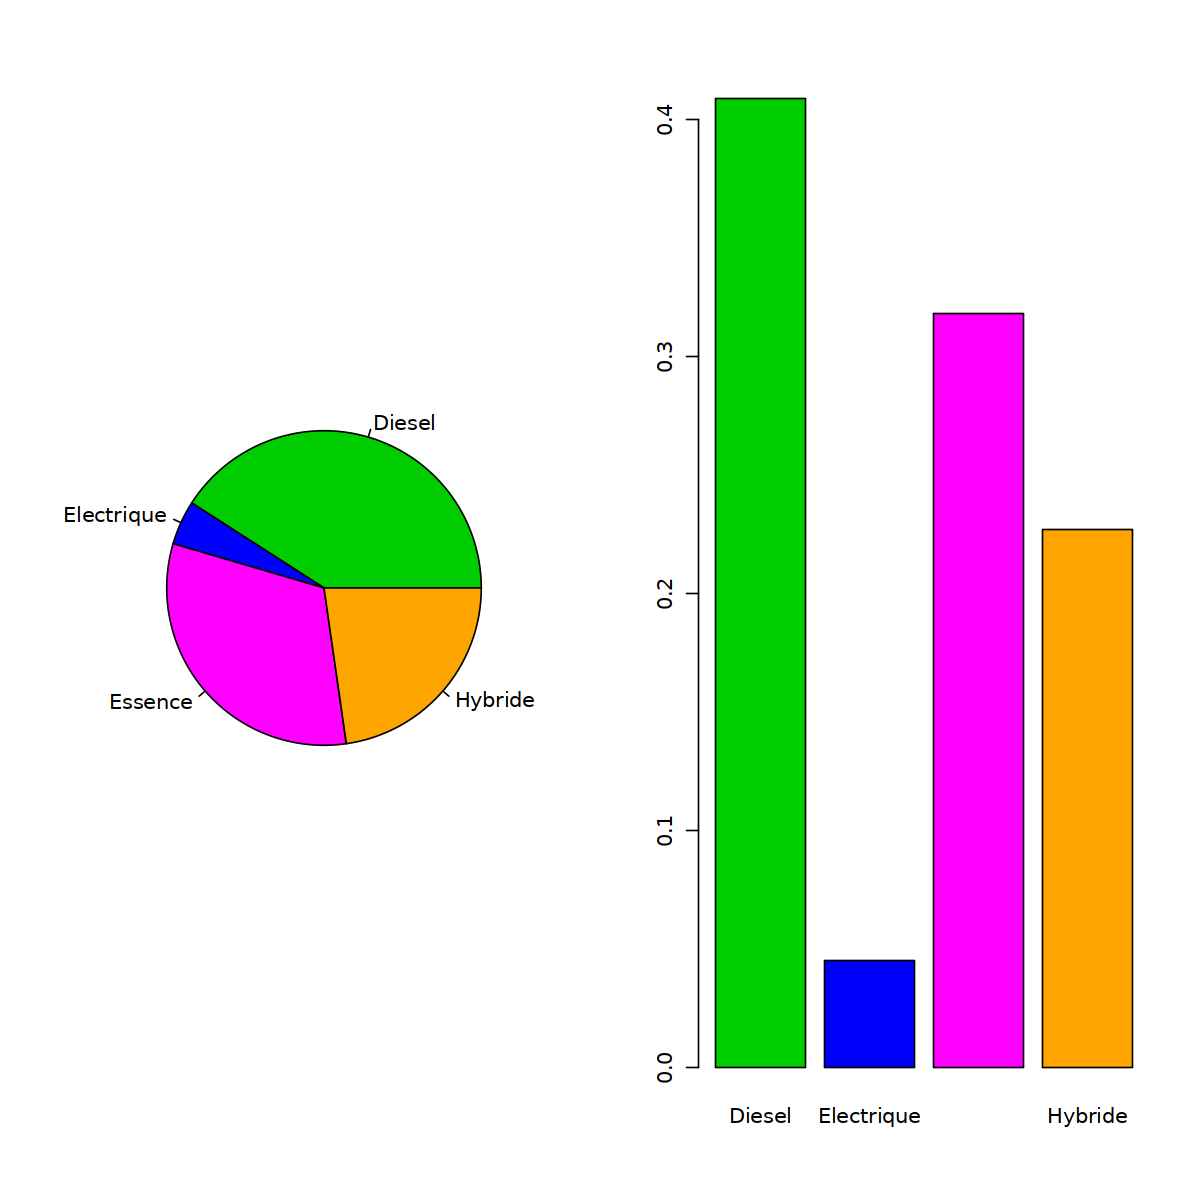

In [41]:
## Code cell n°27 ##
opar <- par(no.readonly=TRUE) # l'argument no.readonly=TRUE permet de supprimer l'affichage d'éventuels warnings 
par(mfrow = c(1,2)) 
pie(table(motorisation$type_de_motorisation), col = c("green3","blue","magenta","orange"))
barplot(table(motorisation$type_de_motorisation)/length(motorisation$type_de_motorisation),col = c("green3","blue","magenta","orange"))


=> Version finale pour aller plus loin en int"grant des alternatives décrites pour chaque figure et avec les bonnes règles d’affichage du script R:

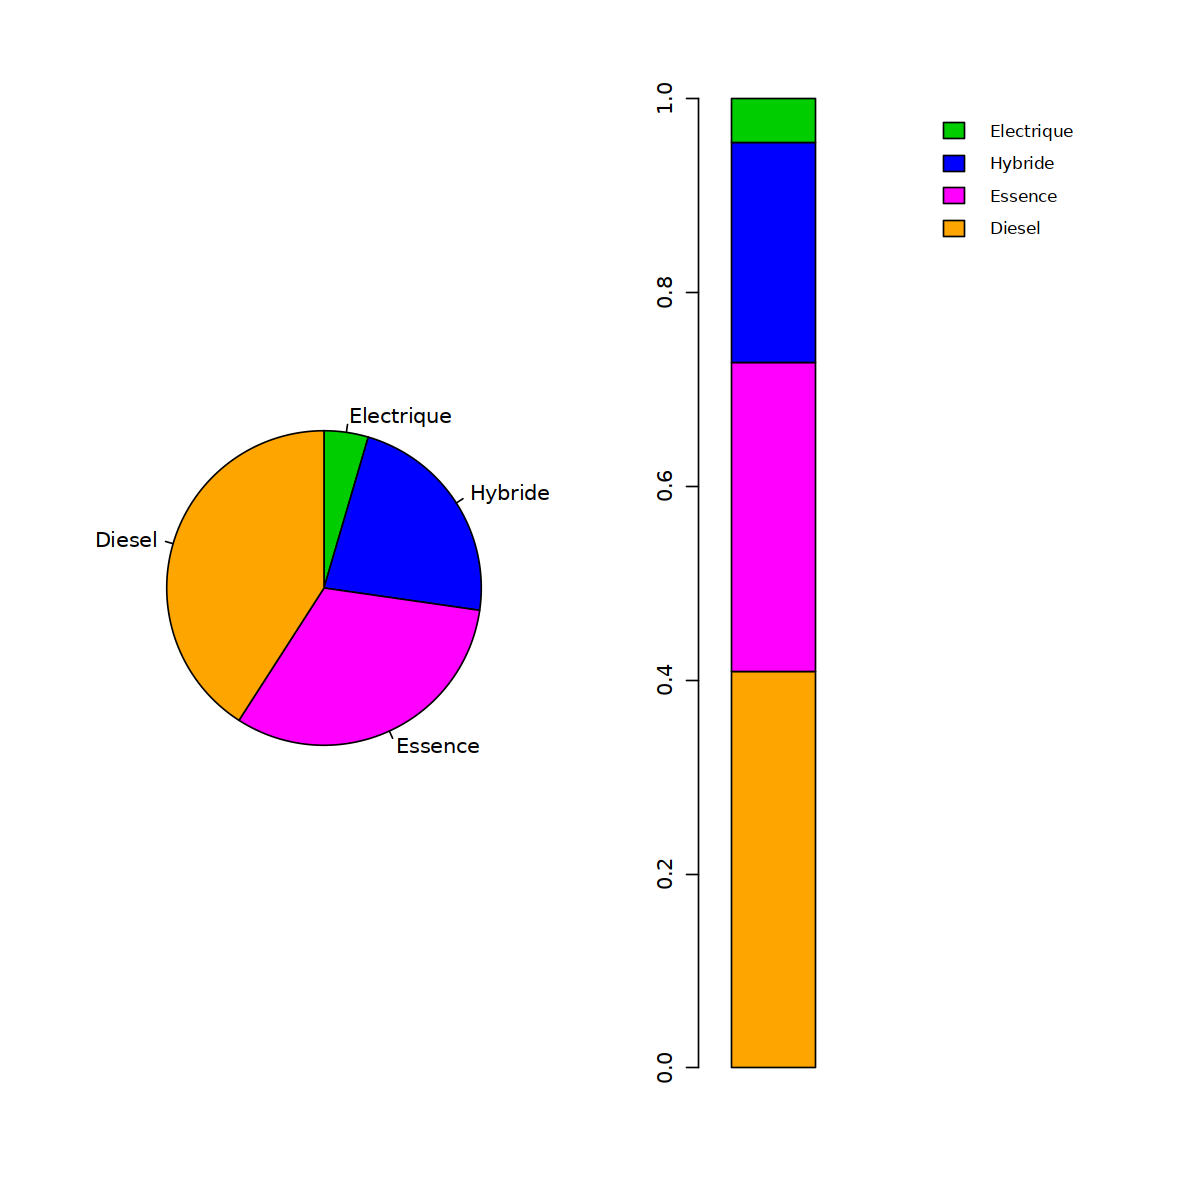

In [42]:
## Code cell n°27.2 ##
opar <- par(no.readonly=TRUE)
par(mfrow = c(1,2)) 
pie(sort(table(motorisation$type_de_motorisation)),
    col = c("green3","blue","magenta","orange"),
    clockwise = T)  
barplot(matrix(sort(table(motorisation$type_de_motorisation)/length(motorisation$type_de_motorisation),
                     decreasing = T)),
         col = c("orange","magenta","blue","green3"),
         legend.text = names(sort(table(motorisation$type_de_motorisation)
                                  ,decreasing = T)),
         args.legend = list(x = "topright", cex = 0.8, bty = "n"),
         width = 1,
         xlim = c(0,5))


<div class="alert alert-block alert-danger"><b>Attention:</b> Vous noterez qu’il est préférable de visualiser les donnees qualitatives, comme ici le type de motorisation, au moyen d’un diagramme en bâtons. Cela vous ai rappele en ‘Note’ dans la fenetre d’aide de la fonction pie!</div>


### Exercice 2: représentation graphique de la distribution d’une variable quantitative continue
---

Tirez aléatoirement un ensemble de 100 nombres compatibles avec une distribution normale de moyenne 10 et d’écart type 5.

Sauvegardez-les dans un objet R.

*__Tip :__*
_fonction recommandée : `rnorm()`_

In [33]:
## Code cell n°28 ##
myrandomdata <- rnorm(100, mean = 10, sd = 5)# bien penser à assigner le résultat de votre tirage dans un objet, sinon, les valeurs changent à chaque fois que vous effectuez un tirage avec la commande rnorm!

Tracez la représentation histogramme des valeurs obtenues.

*__Tip :__*
_fonction recommandée : `hist()`_


In [34]:
## Code cell n°29 ##

Changez le nombre d’intervalles de l’histogramme : environ 5, 50 et 100.

*__Tip :__*_fonction recommandée : `hist()` avec l'argument `breaks`_

In [35]:
## Code cell n°30 ##

Tracez également une boite à moustache horizontale de ces data.

*__Tip :__*
_fonction recommandée : `boxplot()`_

In [36]:
## Code cell n°31 ##

Affichez les 3 histogrammes et le boxplot les uns en dessous des autres dans une même fenêtre graphique.

*__Tip :__*
_fonction recommandée : `par()` avec l'argument `mfrow`_

Je ne vous détaille pas ici chaque graphique, je les empile tout de suite:

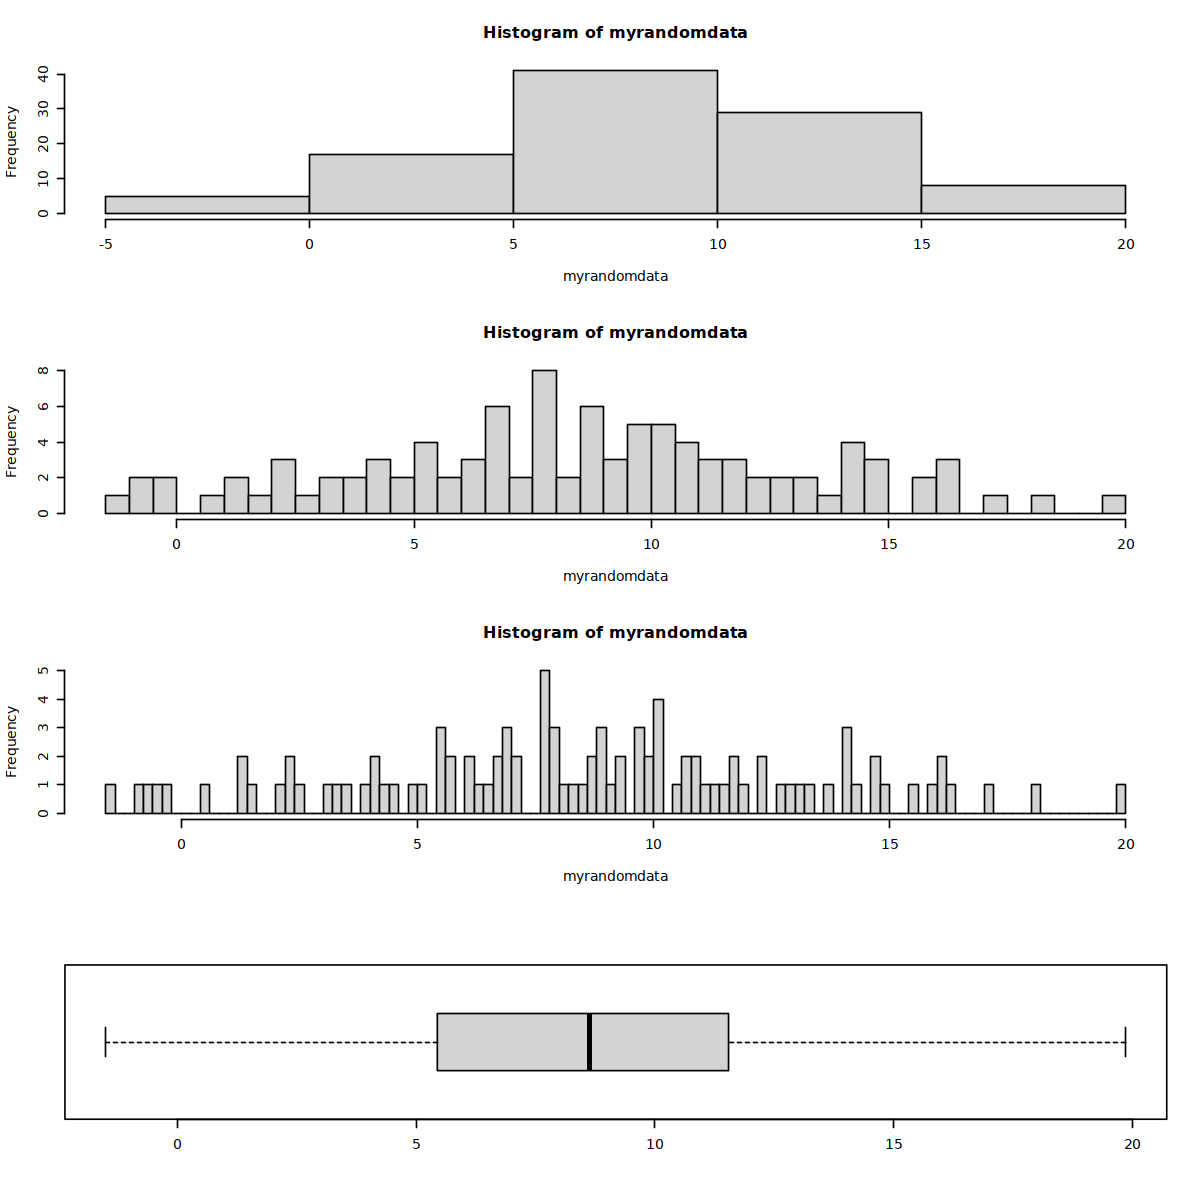

In [37]:
## Code cell n°32 ##
opar <- par()
par(mfrow = c(4,1))
hist(myrandomdata, breaks = 5)
hist(myrandomdata, breaks = 50)
hist(myrandomdata, breaks = 100)
boxplot(myrandomdata, horizontal = T)
suppressWarnings(par(opar))


### Exercice 3 *facultatif* : lois de probabilité
---

<span style="color:blue">  <b>=> Q1: </b> <br>
Si X suit une loi normale de moyenne 10 et d’écart type 5, quelle est la probabilité P(7≤X≤15) ?
Arrondissez à trois décimales.</span>



*__Tip :__*
_fonction recommandée : `pnorm()`, `round()`_

In [43]:
## Code cell n°33 ##
round(pnorm(q = 15, mean = 10, sd = 5) - pnorm(q = 7, mean = 10, sd = 5), 3)  

[1] 0.567

N'oubliez pas que l'aire totale sous la courbe est égale à 1 car la probabilité d'avoir une valeur entre -Inf et +Inf dans une telle loi est égale à 1.

Il faut calculer d'abord la probabilite que X<15, cad l'aire sous la courbe de la loi de probabilité de la loi normale, puis soustraire la probabilité que x<7 !

Alternativement, vous pouviez jouer sur le côté de l'aire sous la courbe affichée.

In [44]:
## Code cell n°34 ##
round(1 - pnorm(q = 15, mean = 10, sd = 5, lower.tail = FALSE) - pnorm(q = 7, mean = 10, sd = 5), 3)

[1] 0.567

<span style="color:blue">  <b>=> Q2: </b> <br>
Si X suit une loi normale de moyenne μ=10 et d’écart type σ=5, quelle est la valeur de k telle que P(X≤k)=0.67 ?
Arrondissez à une décimale.</span>

*__Tip :__*
_fonction recommandée : `qnorm()`, `round()`_

In [46]:
## Code cell n°35 ##
round(qnorm (p = 0.67, mean = 10, sd = 5), 1)

[1] 12.2

<span style="color:blue">  <b>=> Q3: </b> <br>
Soit un test de Chi2 à 3 degrés de libertés avec une valeur de la statistique de `Chi2=6.26`. Quelle est la p-value de ce test ?
Arrondissez à quatre décimales.</span>

*__Tip :__*
_fonction recommandée : `pchisq()`, `round()`_

In [47]:
## Code cell n°36 ##
round(pchisq(q = 6.26, 3, lower.tail = F), 4)

[1] 0.0996

La distribution d'une loi de Chi2 est asymétrique. La pvalue correspond à l'aire sous la courbe à droite de la valeur du seuil considérée. Vous vous souvenez peut-être que pour un Chi2 à 1 dll, le test est significatif avec un risque alpha de 5% lorsque la valeur statistique du Chi2 est supérieure au seuil 3.84 :

In [48]:
## Code cell n°37 ##
round(pchisq(3.84,1, lower.tail=F), 4)

[1] 0.05

On obtient bien 5% pour l'aire sous la courbe à droite de 3.84. Alternativement, vous pouvez retrouver cette valeur de 3.84 avec la fonction qchisq en indiquant 1 ddl et alpha = 5 :

In [49]:
## Code cell n°38 ##
qchisq(0.05, 1, lower.tail=F)

[1] 3.841459


### Exercice 4 *facultatif* : représentation graphique de données quantitatives
---
Nous allons travailler avec le jeu de données `airquality`.

- **Récupérez le jeu de données `airquality`** disponible sous R avec la fonction `data()` et vérifiez sa structure.

*__Tip :__*_fonctions recommandées : `data()`, 
   `str()`_

In [50]:
## Code cell n°39 ##
data(airquality)
str(airquality)

'data.frame':	153 obs. of  6 variables:
 $ Ozone  : int  41 36 12 18 NA 28 23 19 8 NA ...
 $ Solar.R: int  190 118 149 313 NA NA 299 99 19 194 ...
 $ Wind   : num  7.4 8 12.6 11.5 14.3 14.9 8.6 13.8 20.1 8.6 ...
 $ Temp   : int  67 72 74 62 56 66 65 59 61 69 ...
 $ Month  : int  5 5 5 5 5 5 5 5 5 5 ...
 $ Day    : int  1 2 3 4 5 6 7 8 9 10 ...


- **Créez les graphes de la figure ci-dessous** avec ce jeu de données.

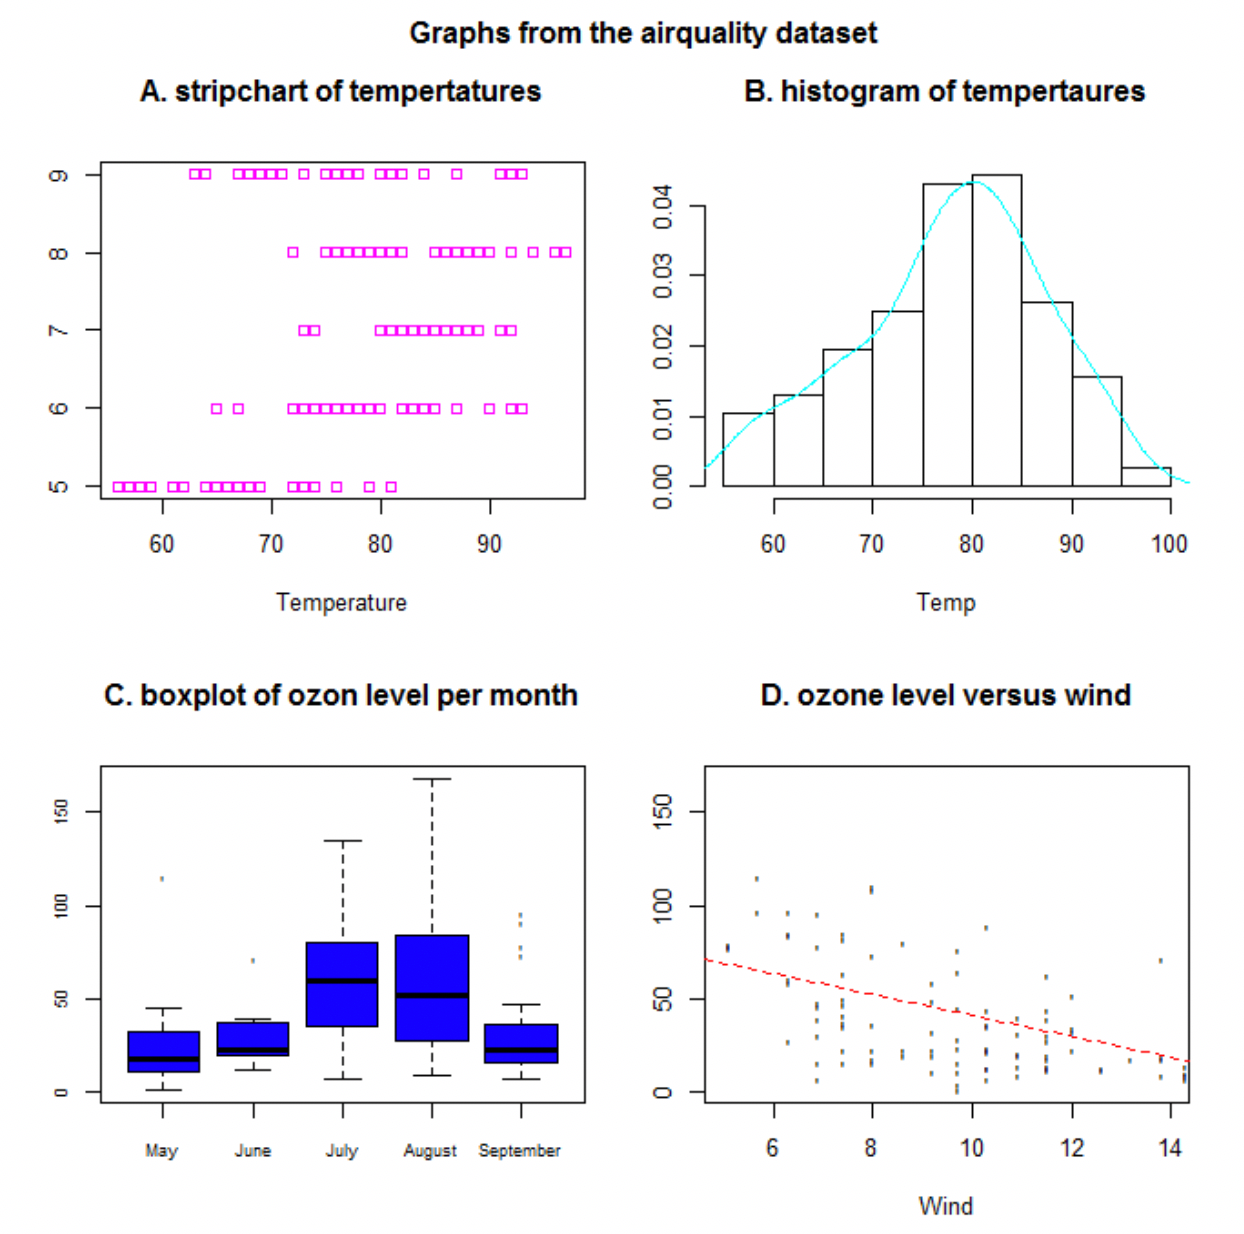

*__Tip :__*
_fonctions recommandées :
    `par()` avec les arguments `mfrow` et `mar`,
    `plot()`,
  `lines()`,
    `boxplot()`,
    `abline()`,
    `lm()`,
    `title()`_

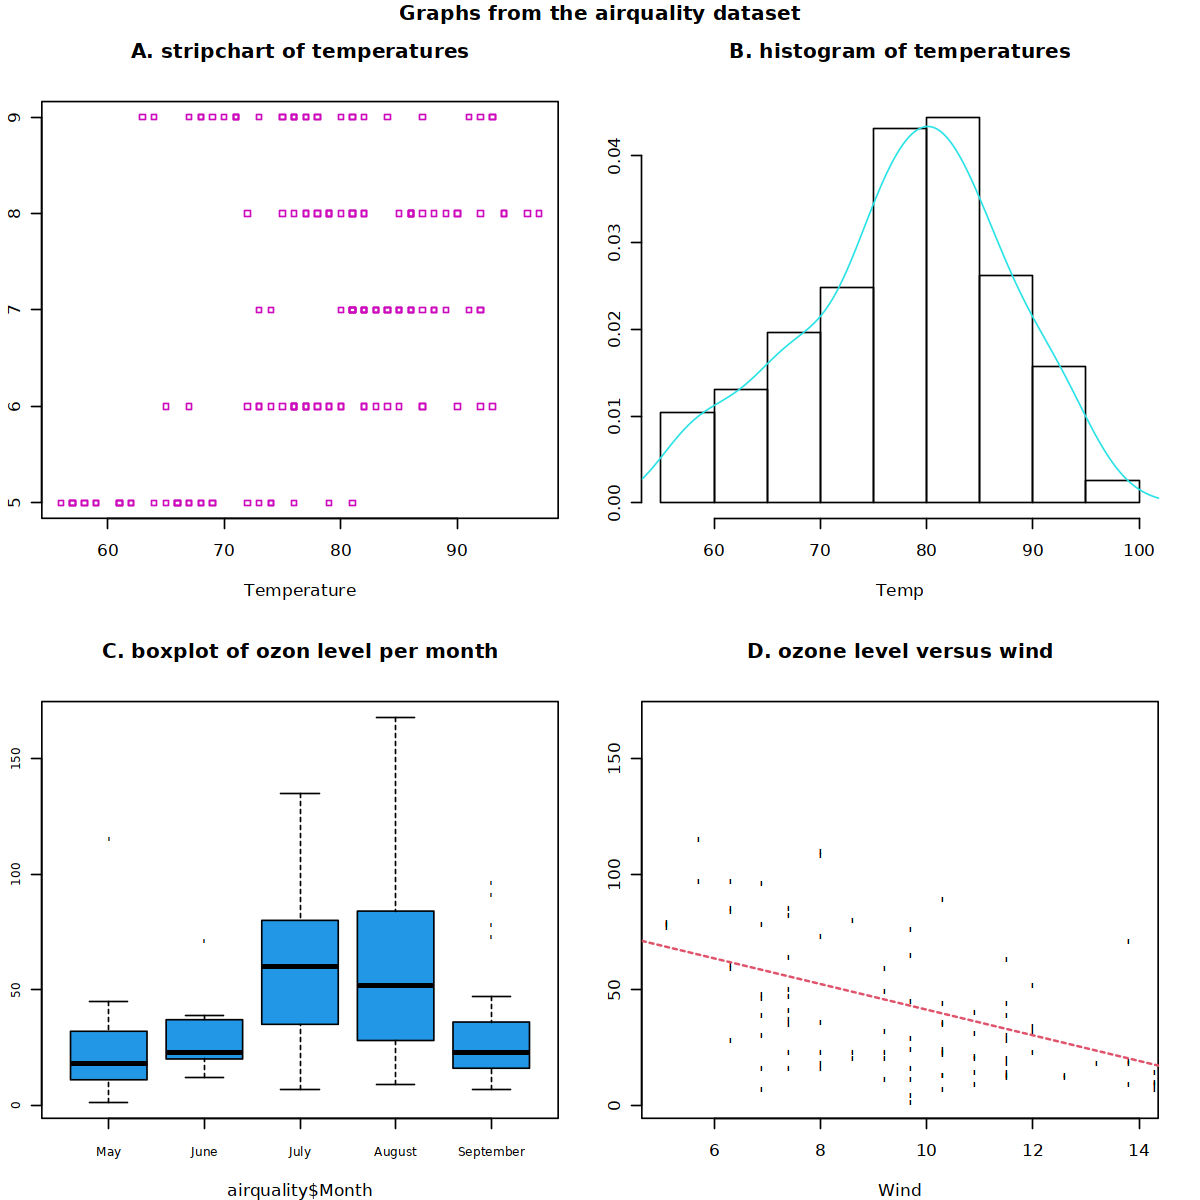

In [52]:
## Code cell n°40 ##
opar <- par()
par(mfrow = c(2,2),
    mar = c(4.1, 2.1, 5.1, 2.1))
stripchart(airquality$Temp~airquality$Month,
           pch = 22,
           xlab = "Temperature", ylab = "Month",
           main = "A. stripchart of temperatures",
           col = 6)
hist(airquality$Temp,
     xlab = "Temp",
     freq = FALSE,
     col="transparent",
     main = "B. histogram of temperatures")
lines(density(airquality$Tem), col = 5)
boxplot(airquality$Ozone~airquality$Month,
        names = c("May", "June", "July", "August", "September"),
        cex.axis = 0.7,
        col = 4,
        pch = "'",
        main = "C. boxplot of ozon level per month")
plot(airquality$Ozone~airquality$Wind,
     xlab = "Wind",
     ylab = "Ozone",
     xlim = c(5,14),
     pch = "'",
     main = "D. ozone level versus wind")
abline(lm(airquality$Ozone~airquality$Wind),
       col = 2, lty = 2, lwd = 1.5)
title("Graphs from the airquality dataset", outer = T, line = -1)
suppressWarnings(par(opar))

For the boxplots, you could also have generated a factor with names to each level:

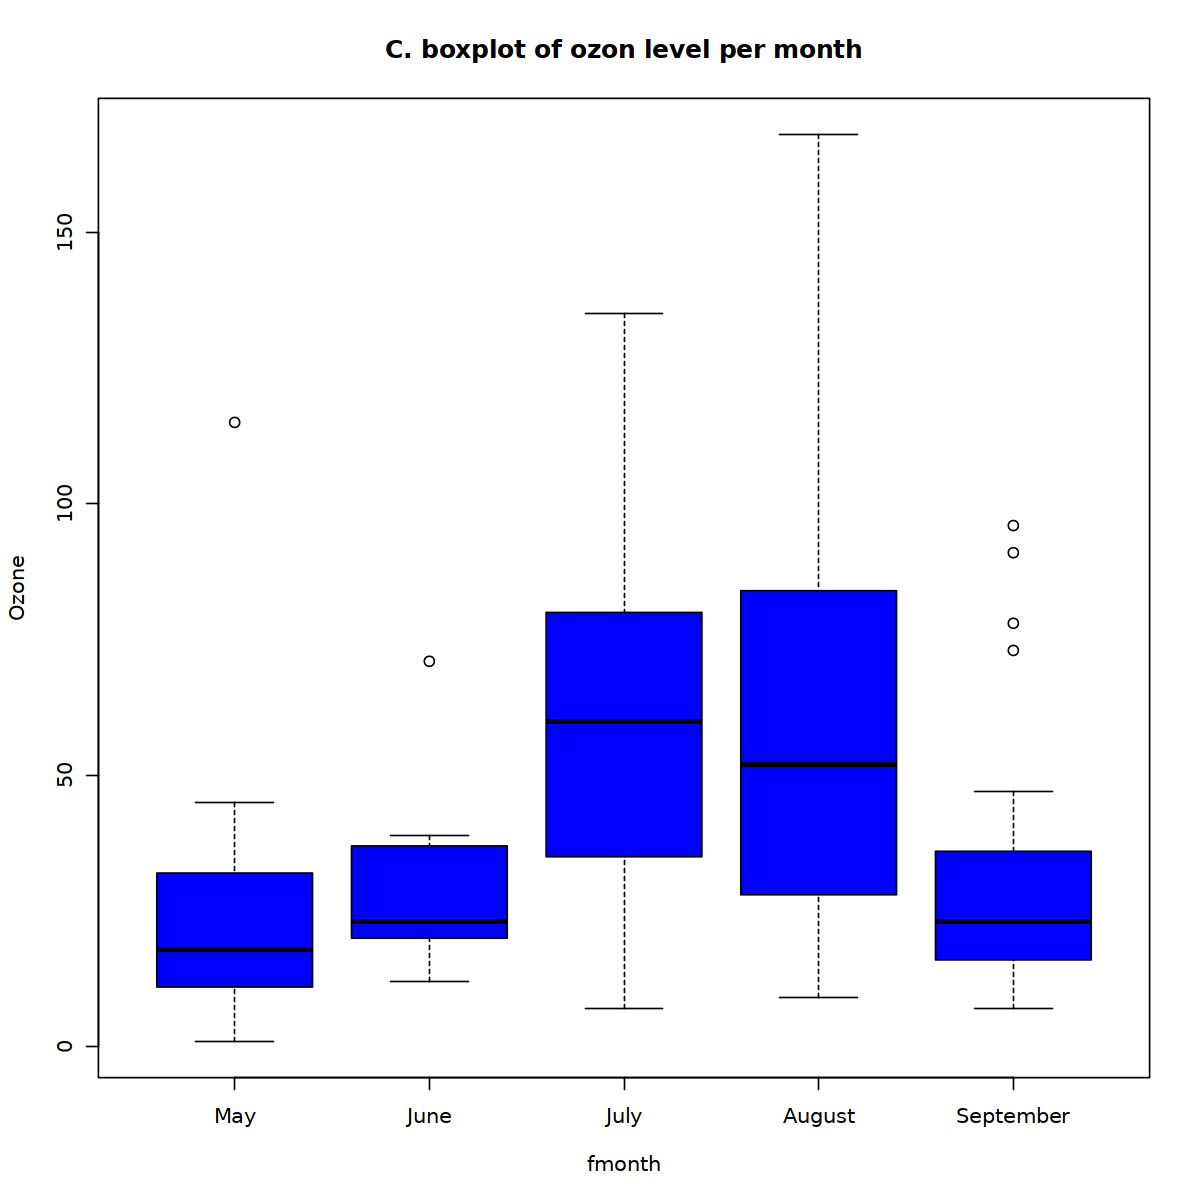

In [53]:
## Code cell n°40.2 ##
fmonth <- factor(airquality$Month,levels = 5:9)
levels(fmonth) <- c("May","June","July","August","September")
boxplot(airquality$Ozone ~ fmonth ,
        col = "blue",
        ylab = "Ozone",
        main = "C. boxplot of ozon level per month")

<mark><b>NOTE IMPORTANTE SUR LES NOMS DES VARIABLES :</b>
Ici pour le boxplot comme pour la plupart des fonctions R, vous pouvez saisir une fois le nom du dataframe avec l'argument `data`, puis simplement mettre le nom des variables sans répéter le nom du dataframe</mark>

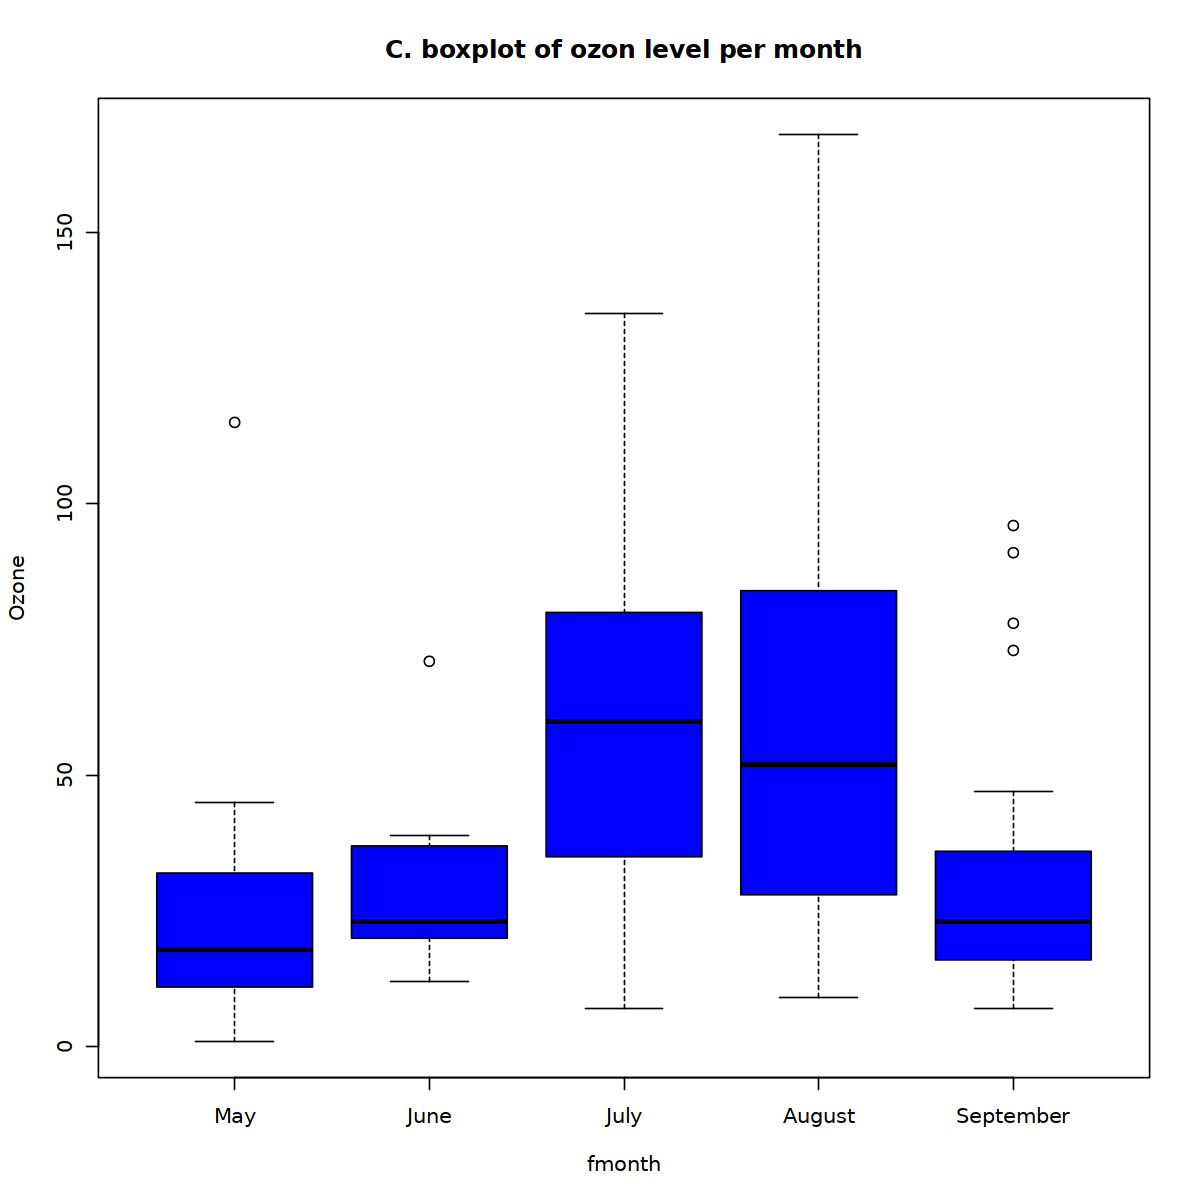

In [54]:
## Code cell n°40.3 ##
boxplot(data = airquality, Ozone~fmonth , col = "blue", ylab = "Ozone", main = "C. boxplot of ozon level per month")

Alternativement, vous pouvez utiliser `attach()` pour accéder aux variables de l'ensemble de données directement par leur nom, puis saisir vos commandes, puis `detach()` une fois terminé. Je ne recommande pas cette dernière méthode car on oublie souvent de détacher.

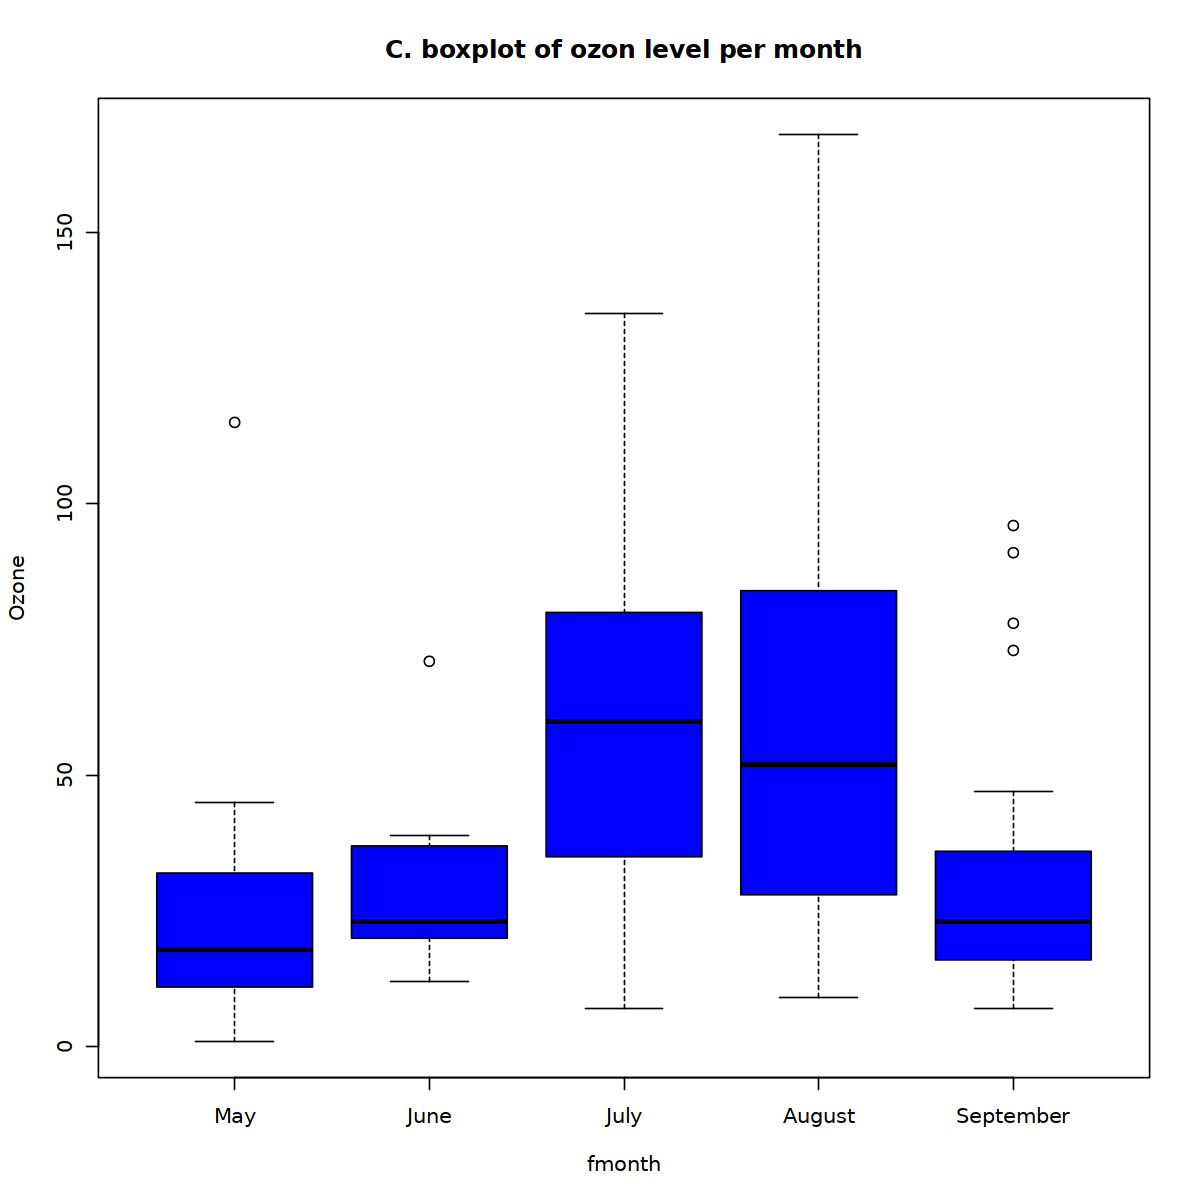

In [55]:
## Code cell n°40.4 ##
attach(airquality)
boxplot(Ozone ~ fmonth , col = "blue", ylab = "Ozone", main = "C. boxplot of ozon level per month")
detach(airquality)

### Exercice 5 : test de comparaison de moyennes, impact de la différence entre les moyennes et de la variance, tests multiples
---

#### 5.1. Test de comparaison de moyennes

Nous allons d'abord tirer deux échantillons de deux populations présentant des **moyennes différentes et une même variance**.

A titre d'exemple dans ce practical nous prendrons la "taille des humains debout" comme trait d'intérêt.
En France en 2001, les données de l'INSEE indiquaient une taille moyenne de 1.62 pour les femmes et de 1.74 m pour les hommes. Dans l'ensemble de la population, l'écart-type était d'environ 7 cm.

- Générez 2 échantillons `sample1` et `sample2` de taille 100, issus de la population d'hommes et de femmes avec les paramètres indiqués en supposant que la densité de probabilité de la taille suit une loi normale.

*__Tip:__ utiliser la fonction `rnorm()`*

In [56]:
## Code cell n°41 ##
sample1 <- rnorm(n = 100, mean = 174, sd = 7)

In [57]:
## Code cell n°42 ##
sample2 <- rnorm(n = 100, mean = 162, sd = 7)

- Regardez les valeurs résumées des distributions observées et faites un simple boxplot de ces distributions.

*__Tip:__ utiliser les fonctions `summary()` et `boxplot`*

In [58]:
## Code cell n°43 ##
summary(sample1)
summary(sample2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  156.4   168.2   174.2   173.9   178.7   195.3 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  144.0   157.7   162.3   162.6   167.2   182.1 

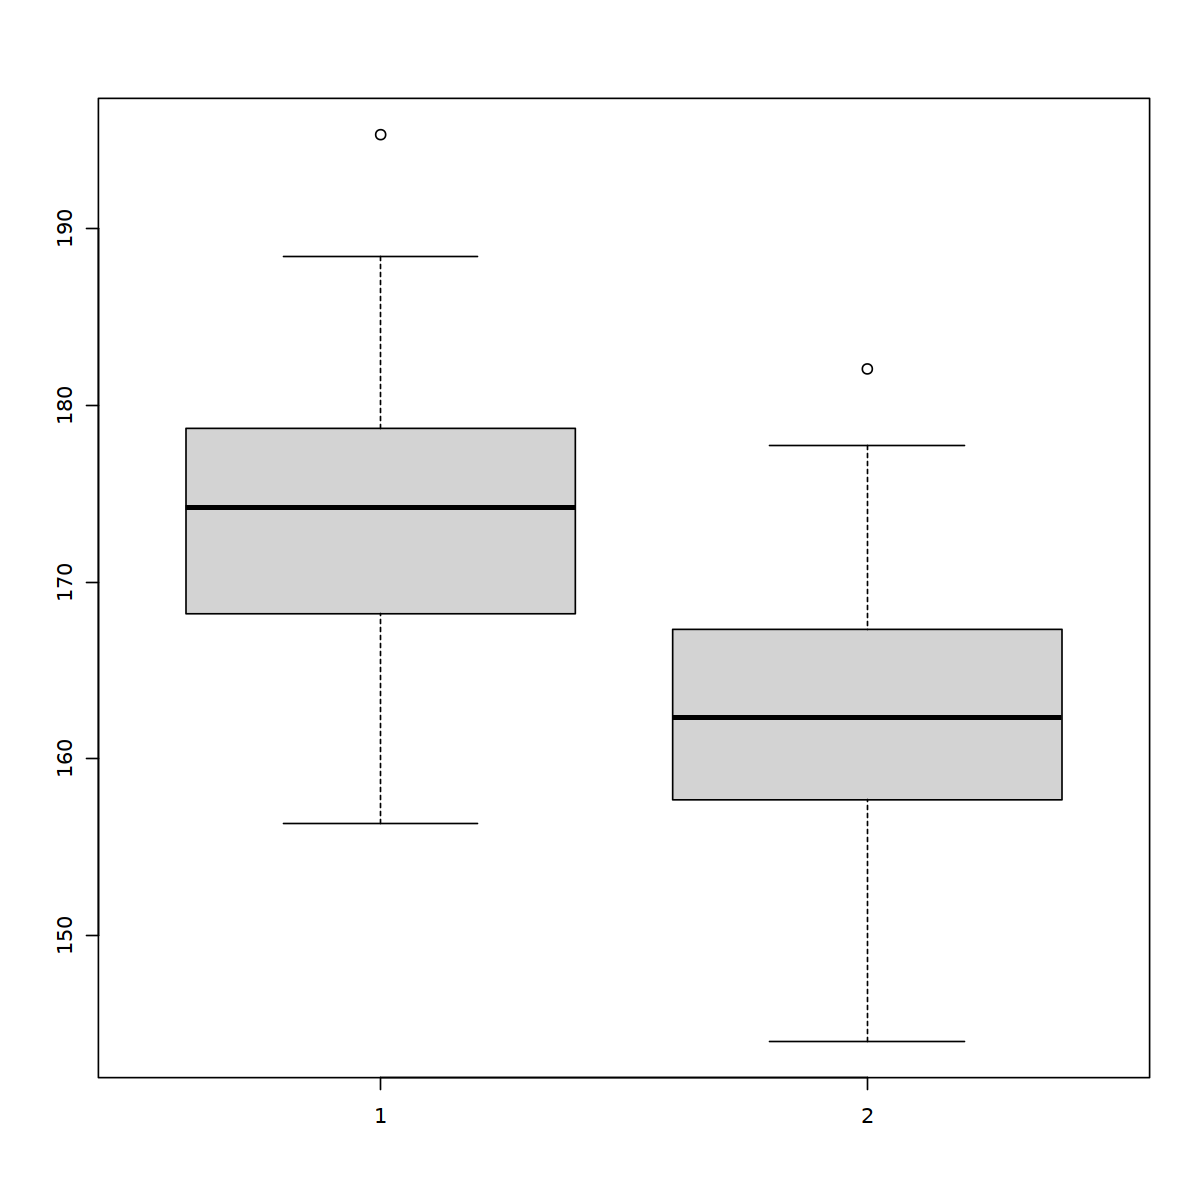

In [59]:
## Code cell n°44 ##
boxplot(sample1, sample2)

- Testez la différence des moyennes entre les deux populations d'où sont issus ces échantillons avec un test de Student bilatéral

*__Tip:__ utiliser la fonction `t.test()`*

In [60]:
## Code cell n°45 ##
t.test(sample1, sample2, alternative = "two.sided")


	Welch Two Sample t-test

data:  sample1 and sample2
t = 10.963, df = 196.86, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  9.289196 13.364204
sample estimates:
mean of x mean of y 
 173.9030  162.5763 


- Quelle est la valeur de la p-value?

*__Tip:__ utilisez la fonction `str()` pour voir comment extraire cette pvalue du test*

In [61]:
## Code cell n°46 ##
str(t.test(sample1, sample2, alternative = "two.sided"))

List of 10
 $ statistic  : Named num 11
  ..- attr(*, "names")= chr "t"
 $ parameter  : Named num 197
  ..- attr(*, "names")= chr "df"
 $ p.value    : num 3.89e-22
 $ conf.int   : num [1:2] 9.29 13.36
  ..- attr(*, "conf.level")= num 0.95
 $ estimate   : Named num [1:2] 174 163
  ..- attr(*, "names")= chr [1:2] "mean of x" "mean of y"
 $ null.value : Named num 0
  ..- attr(*, "names")= chr "difference in means"
 $ stderr     : num 1.03
 $ alternative: chr "two.sided"
 $ method     : chr "Welch Two Sample t-test"
 $ data.name  : chr "sample1 and sample2"
 - attr(*, "class")= chr "htest"


In [62]:
## Code cell n°46.2 ##
t.test(sample1, sample2, alternative = "two.sided")$p.value

[1] 3.887064e-22

#### 5.2. Impact de la taille des échantillons, de la différence des moyennes ou de la variance

Nous allons à présent étudier l'impact de la différence entre les moyennes des populations de départ ou celui de la variance sur la puissance de détecter une différence.

- Pour jouer sur ces différents paramètres, on écrit une fonction qui prend comme argument la taille des échantillons, la moyenne et la variance de chacune des populations, et qui renvoie la statistique t et la pvalue du test de Student.

In [63]:
## Code cell n°47 ##
compute_tv <- function(n1, m1, s1, n2, m2, s2){
    sample1 <- rnorm(n = n1, mean = m1, sd = s1)
    sample2 <- rnorm(n = n2, mean = m2, sd = s2)
    tval <- t.test(sample1, sample2, alternative = "two.sided")$statistic
    pval <- t.test(sample1, sample2, alternative = "two.sided")$p.value
    tv <- list("t" = tval, "p" = pval)
    return(tv)
}

- Faites le test en prenant à présent les **écarts types différents** chez les hommes et les femmes qui sont respectivement de 7.1 cm et 6.5 cm dans la population Française en 2001.

In [64]:
## Code cell n°48 ##
compute_tv(n1 = 100, m1 = 174, s1 = 7.1, n2 = 100, m2 = 162, s2 = 6.5)

$t
       t 
10.76689 

$p
[1] 2.144585e-21

- Refaites le test **en réduisant les effectifs** à 30 pour chaque échantillon.

In [65]:
## Code cell n°49 ##
compute_tv(n1 = 30, m1 = 174, s1 = 7.1, n2 = 30, m2 = 162, s2 = 6.5)

$t
       t 
7.259973 

$p
[1] 2.637375e-09

<span style="color:blue">**=> Comment a varié la significativité?**</span>

Les paramètres de la distribution de la taille des humains varient aussi entre les populations dans le monde.

- Refaites le test avec ces effectifs de 30, en gardant la même différence entre les moyennes mais **en augmentant la variance** à 25 pour chaque population.

In [66]:
## Code cell n°50 ##
compute_tv(30, 174, 25, 30, 162, 25)

$t
        t 
0.8105993 

$p
[1] 0.4210226

<span style="color:blue">**=> La différence, même importante entre les moyennes des populations, est-elle encore détectable?**</span>

- Refaites le test avec des populations présentant une **petite différence entre les moyennes**  (3 cm, avec par exemple 160 cm pour les femmes et 163 cm pour les hommes) et **des variances faibles** (3 cm)

In [67]:
## Code cell n°51 ##
compute_tv(30, 163, 3, 30, 160, 3)

$t
       t 
5.075582 

$p
[1] 4.291153e-06

<span style="color:blue">**=> Détectez-vous quand même une différence statistiquement significative?**</span>

<div class="alert alert-block alert-warning"><b>Conclusion:</b>
La puissance du test augmente avec:
    
- la taille des échantillons
- la différence entre les moyennes des populations
- une petite variance </div>

#### 5.3. Effet des tests multiples sur le taux de faux positifs
---

Nous sommes entrés dans l'ère des données massives. Par exemple, dans les jeux de données omiques, on effectue autant de tests que de "features" (e.g., gènes ou transcrits).

Nous n'allons pas générer dans ce tutoriel de multiples features mais nous allons prendre notre trait de la taille et tester, par simulation, l'impact des tests multiples sur les faux positifs.

Nous partons d'un dataframe que nous générons en rassemblant les données des deux échantillons dans un dataframe avec deux colonnes `height` pour la taille et `grp` pour le groupe

*__Tip:__ utilisez la fonction `data.frame()` sur un vecteur concaténant les taille des deux échantillons avec la fonction `c()` et un vecteur répétant les valeurs 1 et 2 100 fois dans le bon ordre avec la fonction `rep()` et son argument `each=`*

In [68]:
## Code cell n°52 ##
df <- data.frame(height = c(sample1, sample2), grp = rep(c(1,2), each = 100))

Nous affichons les premières, dernières lignes du dataframe et sa structure. Comptez également le nombre d'observations appartenant au groupe 1 ou 2.

*__Tip:__ utilisez les fonctions `head()` , `tail()`, `str()` et `table()`.*

In [69]:
## Code cell n°53 ##
head(df)

,height,grp
,<dbl>,<dbl>
1,170.4053,1
2,186.6270,1
3,182.1630,1
4,178.7504,1
5,175.0416,1
6,169.3838,1


In [70]:
## Code cell n°54 ##
tail(df)

,height,grp
,<dbl>,<dbl>
195,166.4339,2
196,170.0558,2
197,160.9418,2
198,157.7015,2
199,156.6800,2
200,177.0371,2


In [71]:
## Code cell n°55 ##
str(df)

'data.frame':	200 obs. of  2 variables:
 $ height: num  170 187 182 179 175 ...
 $ grp   : num  1 1 1 1 1 1 1 1 1 1 ...


In [72]:
## Code cell n°56 ##
table(df$grp)


  1   2 
100 100 

- Nous allons **simuler 10000 échantillons sous une hypothèse nulle** où le groupe ne modifie pas les moyennes. Pour ce faire, on génére 10000 permutations de Monte-Carlo en tirant au hasard les statuts pour les groupes. Et on récupère les valeurs de tests `tvalues` et `pvalues` .

*Dans la commande ci-dessous, la fonction `for()` sert à  répéter le code 1000 fois. Dans la boucle, on génère un vecteur avec les valeurs permutées pour le groupe et on effectue le test pour récupérer les valeurs p et de statistique t.* 

In [73]:
## Code cell n°57 ##
tvalues <- c()
pvalues <- c()

for(i in 1:10000){
    perm_df <- df
    perm_df$grp <- sample(perm_df$grp, size=200)
    tval <- t.test(perm_df$height ~ perm_df$grp, alternative = "two.sided")$statistic
    tvalues <- c(tvalues, tval)
    pval <- t.test(perm_df$height ~ perm_df$grp, alternative = "two.sided")$p.value
    pvalues <- c(pvalues, pval)
}

- Affichez les valeurs résumées et un histogramme des statistiques t contenues dans le vecteur `tvalues`:

In [74]:
## Code cell n°58 ##
summary(tvalues)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-3.930225 -0.671605  0.016210  0.004876  0.673503  4.332606 

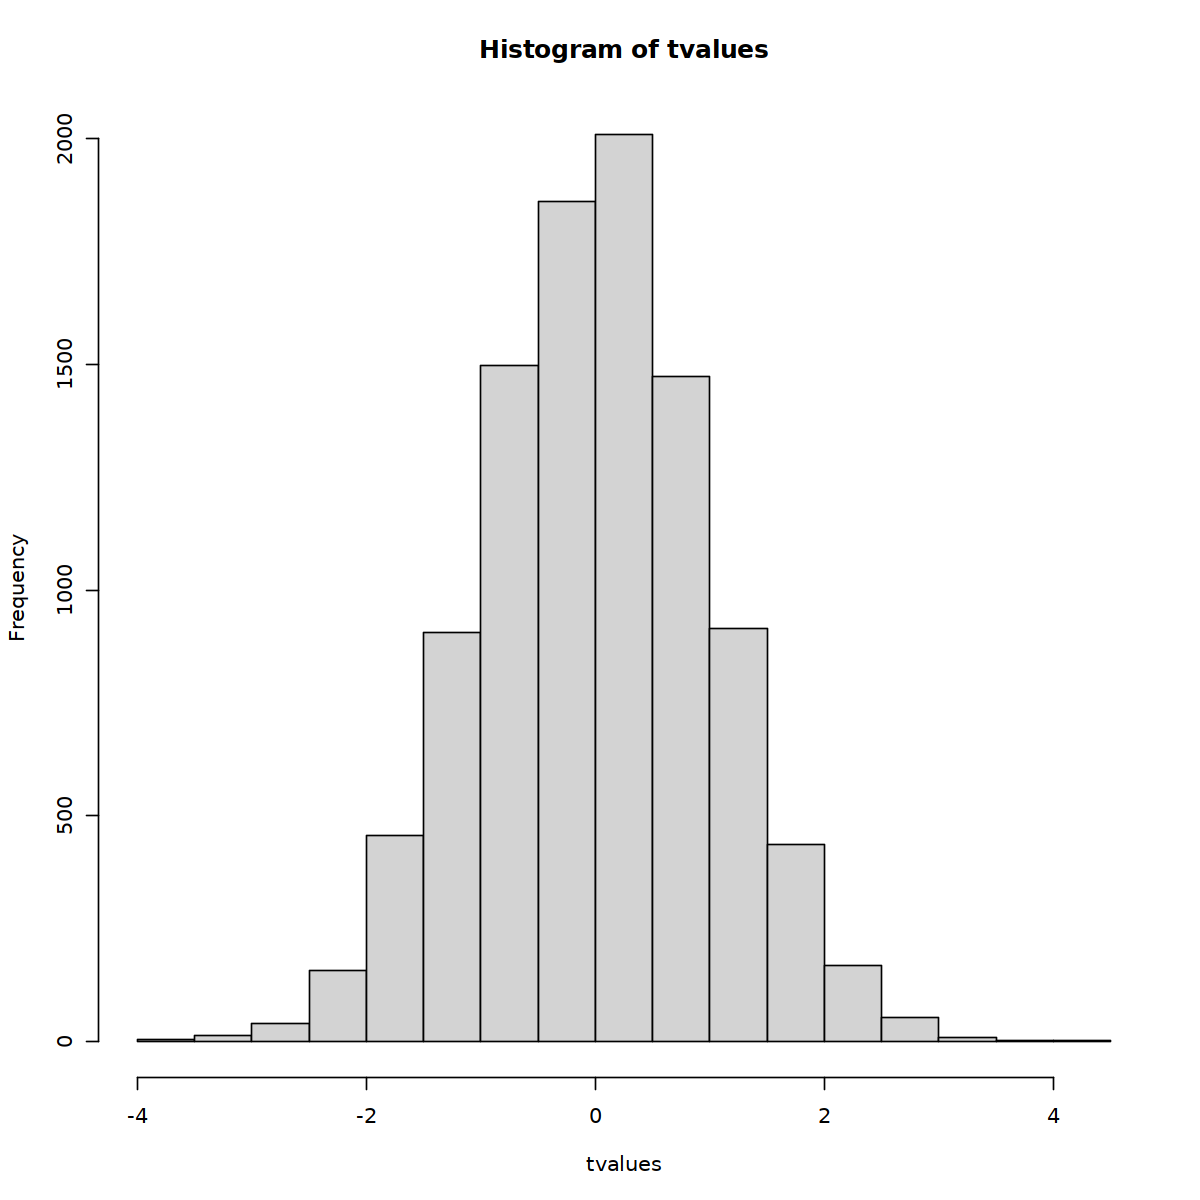

In [76]:
## Code cell n°59 ##
hist(tvalues)

- Combien de valeurs de statistique sont significatives bien que conformes à H0? 


*__Tip:__ Utilisez la fonction `qnorm()` pour retrouver la valeur seuil d'une loi normale au risque alpha = 5%* 

In [77]:
## Code cell n°60 ##
qnorm(0.025, 0, 1, lower.tail=FALSE)

[1] 1.959964

In [78]:
## Code cell n°61 ##
length(which(abs(tvalues)>=1.96))

[1] 493

**=> Ce résultat était-il attendu?**

- Affichez les valeurs résumées et un histogramme des pvalues:

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
0.0000236 0.2518302 0.5021493 0.5015227 0.7522445 0.9999997 

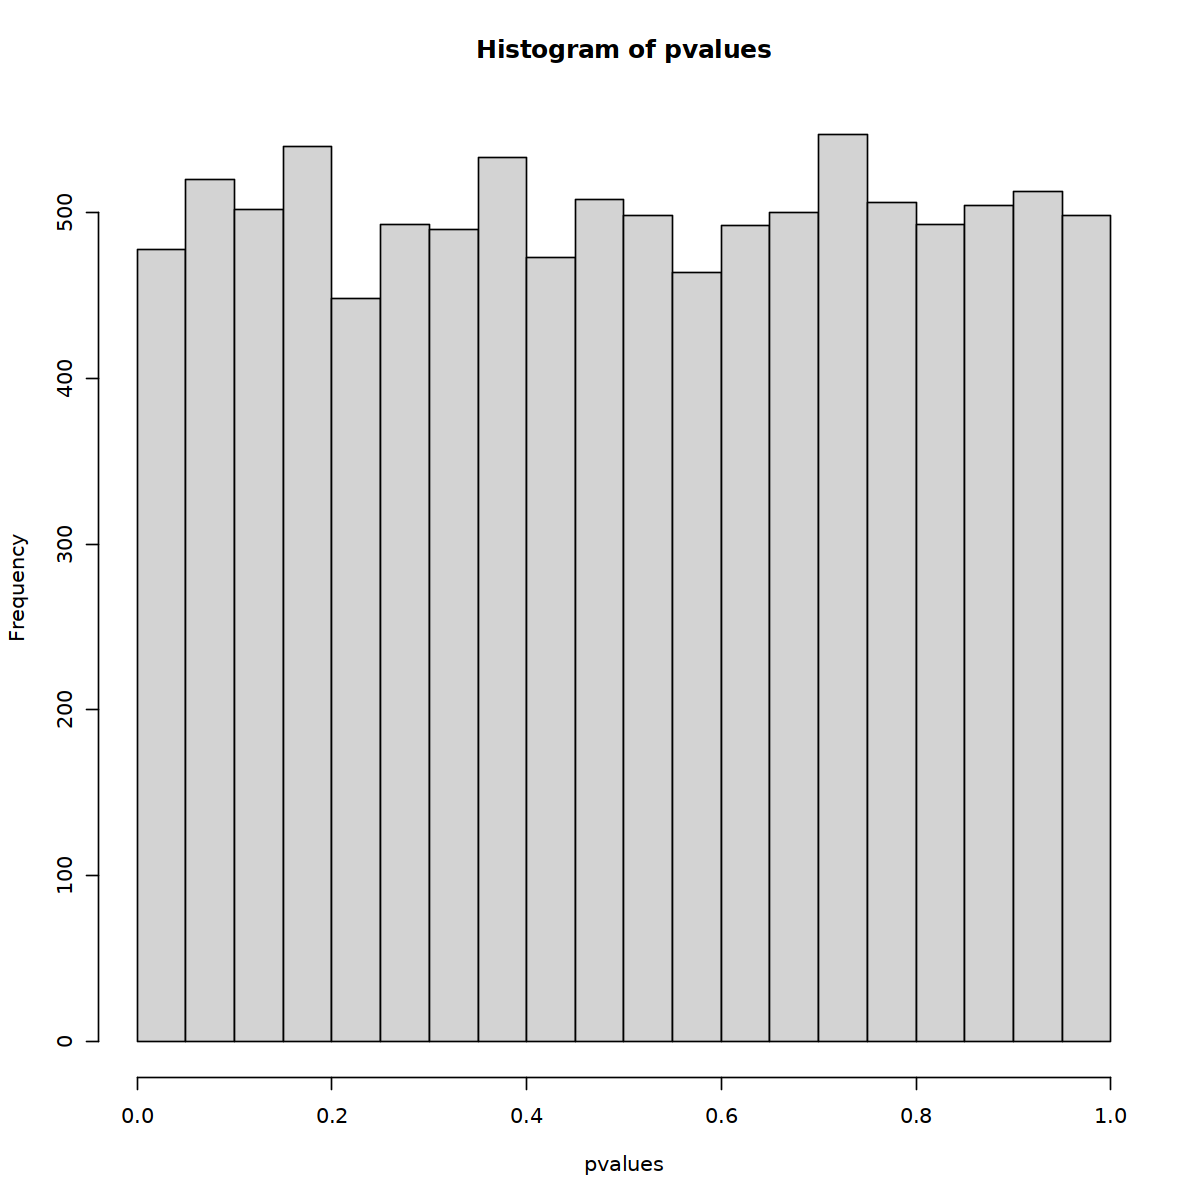

In [79]:
## Code cell n°62 ##
summary(pvalues)
hist(pvalues)

**=> Quelle est la distribution des pvalues sous HO?**

<div class="alert alert-block alert-warning"><b>Conclusion:</b>
Sous HO:
    
- on obtient environ une proportion alpha de valeurs significatives -> si 10000 tests ont été effectués, cela fait environ 500 différences significatives ! Il faut donc corriger pour les tests multiples pour éviter un taux de faux positifs trop élevé.
- la distribution des pvalues est une distribution uniforme entre 0 et 1.</div>

### Exercice 6 facultatif : un exemple d'analyse statistique de données
---

Importez dans R le fichier `poisson.txt` disponible dans `/shared/projects/2413_rnaseq_cea/alldata/Example_Data` ou sur le google drive : https://drive.google.com/file/d/11TsqA_ZwZ7o8_osKjdXBIMCqUNKY2YRi/view?usp=drive_link.

Il s’agit d’un jeu de données de l’espèce de poisson “grand corégone” du lac Nathalie dans le territoire de la baie James (province du Québec) (*d’après B. Scherrer*). En 1977, Dumont a cherché les relations existantes entre le potentiel reproducteur (nombre d’œufs) de cette espèce de poisson (grand Corégone) et plusieurs caractères morphologiques. L’étude a été menée afin de déterminer une éventuelle relation entre le nombre d’œufs, révélant le potentiel reproducteur des poissons, et les variables morphologiques caractérisant ces poissons.

__1. Statistiques descriptives__

Identifier les variables et le nombre d’observations de l’échantillon.

_Fonctions recommandées :_
`read.table()`, `head()`, `dim()`, `str()`, `names()`

In [80]:
## Code cell n°63 ##
coregone <- read.table("/shared/projects/2413_rnaseq_cea/alldata/Example_Data/poisson.txt", stringsAsFactors = FALSE, header = TRUE)
str(coregone)

'data.frame':	41 obs. of  5 variables:
 $ longueur_mm     : int  420 442 397 421 464 436 424 440 420 421 ...
 $ poids_total_g   : int  785 850 655 790 965 880 840 1030 770 890 ...
 $ poids_gonades_mg: num  74.1 54.5 49.6 71.6 69.4 ...
 $ age_annee       : int  12 10 9 9 11 9 8 12 10 10 ...
 $ oeufs_nombre    : int  10676 9461 8328 10281 14028 4984 13697 17206 13485 14055 ...


Calculer la moyenne, la variance et l’écart-type de chaque variable aléatoire.
    
_Fonctions recommandées:_
        `mean()`
        `var()`
        `sd()`
        `apply()`
        `summary()`

In [81]:
## Code cell n°64 ##
summary(coregone)

  longueur_mm    poids_total_g    poids_gonades_mg   age_annee    
 Min.   :397.0   Min.   : 655.0   Min.   : 31.30   Min.   : 8.00  
 1st Qu.:421.0   1st Qu.: 825.0   1st Qu.: 77.70   1st Qu.:10.00  
 Median :434.0   Median : 855.0   Median : 97.70   Median :10.00  
 Mean   :435.3   Mean   : 901.6   Mean   : 92.84   Mean   :10.39  
 3rd Qu.:443.0   3rd Qu.: 975.0   3rd Qu.:101.90   3rd Qu.:11.00  
 Max.   :487.0   Max.   :1310.0   Max.   :170.30   Max.   :13.00  
  oeufs_nombre  
 Min.   : 4984  
 1st Qu.:13139  
 Median :14606  
 Mean   :15071  
 3rd Qu.:16950  
 Max.   :25834  

Alternativement, vous pouviez utiliser la fonction `apply()`

In [82]:
## Code cell n°65 ##
cat("moyenne des variables:\n")
apply(coregone, 2, mean)# apply est une fonction qui permet d'appliquer des fonctions par colonne ou ligne d'un dataframe

moyenne des variables:


longueur_mm    poids_total_g poids_gonades_mg        age_annee 
       435.29268        901.58537         92.84390         10.39024 
    oeufs_nombre 
     15070.75610

In [84]:
## Code cell n°66 ##
cat("Ecart type des variables:\n")
apply(coregone, 2, sd)

Ecart type des variables:


longueur_mm    poids_total_g poids_gonades_mg        age_annee 
       19.755055       141.264110        25.247169         1.180636 
    oeufs_nombre 
     4173.765062

---
Réaliser les représentations des distributions de chaque variable aléatoire.

_Fonctions recommandées:_
    `hist()`, `par(mfrow = c(-,-))`, `curve()`, `dnorm()`


Ces variables vous semblent-elles distribuées selon une loi Normale ? Pour le vérifier, superposez sur chaque histogramme les courbes de densité des lois normales correspondantes (les moyennes et les variances sont estimées à partir des données de l’échantillon). Vous pouvez tracer par superposition la loi normale de même moyenne et écart type sur chaque histogramme. Vous pouvez également tracer le qqplot pour comparer la distribution de chaque variable à celle d’une loi normale. Enfin, vous pouvez tester l’hypothèse nulle de la normalité par un test de Shapiro.

_Fonctions recommandées:_
`curve()`, `dnorm()`, `qqplot()`, `qqline()`

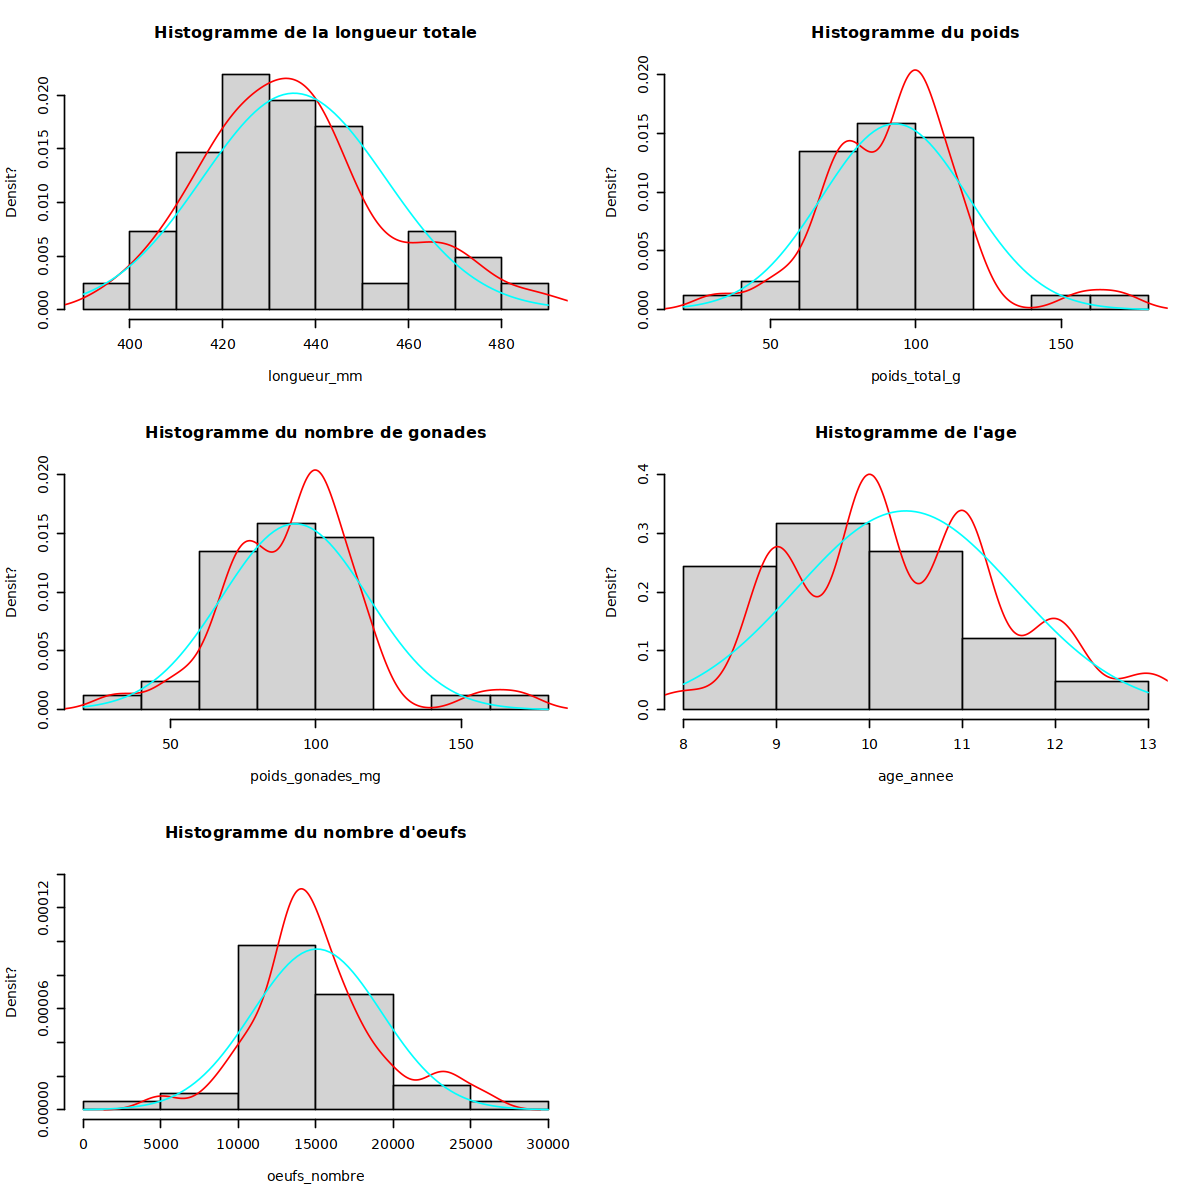

In [85]:
## Code cell n°67 ##
##histogrammes avec densite des donnees en rouge et loi normale supperposee en cyan
opar <- par()
par(mfrow = c(3, 2))

hist(coregone$longueur_mm,prob=T,
     main = "Histogramme de la longueur totale",
     xlab = colnames(coregone)[1],
     ylab = "Densit?")
lines(density(coregone$longueur_mm),col="red" )
curve(dnorm(x,mean(coregone$longueur_mm), sd(coregone$longueur_mm)), col="cyan", add=T)

hist(coregone$poids_g,prob=T,
     main = "Histogramme du poids",
     xlab = colnames(coregone)[2],
     ylab = "Densit?", ylim=c(0,0.02))
lines(density(coregone$poids_g), col="red" )
curve(dnorm(x,mean(coregone$poids_g),sd(coregone$poids_g)), col="cyan", add=T)

hist(coregone$poids_gonades_mg,prob=T,
     main = "Histogramme du nombre de gonades",
     xlab = colnames(coregone)[3],
     ylab = "Densit?", ylim=c(0,0.02))
lines(density(coregone$poids_gonades_mg),col="red" )
curve(dnorm(x,mean(coregone$poids_gonades_mg), sd(coregone$poids_gonades_mg)), col="cyan",add=T)

hist(coregone$age_annee,prob=T,
     main = "Histogramme de l'age",
     xlab = colnames(coregone)[4],
     ylab = "Densit?", ylim=c(0,0.4))
lines(density(coregone$age_annee),col="red" )
curve(dnorm(x,mean(coregone$age_annee), sd(coregone$age_annee)), col="cyan",add=T)

hist(coregone$oeufs_nombre,prob=T,
     main = "Histogramme du nombre d'oeufs",
     xlab = colnames(coregone)[5],
     ylab = "Densit?", ylim=c(0,1.4e-04))
lines(density(coregone$oeufs_nombre),col="red" )
curve(dnorm(x,mean(coregone$oeufs_nombre), sd(coregone$oeufs_nombre)),col="cyan",add=T)
suppressWarnings(par(opar))

Pour note: vous pouvez rechercher la valeur maximale sur l’axe des y en regardant le max de la densité et l’utiliser comme valeur dans l’argument `ylim`. Pour la distribution normale théorique, la moyenne est aussi le mode donc pour la valeur Y maximale, il suffit donc de récupérer la valeur Y à cette moyenne donnée par la fonction `dnorm()` :

In [86]:
## Code cell n°68 ##
dnorm(mean(coregone$oeufs_nombre),mean(coregone$oeufs_nombre),sd(coregone$oeufs_nombre))

[1] 9.558331e-05

Pour les valeurs de la variable avec `max(hist(variable)$density)` regardez la structure de l’histogramme avec `str()` et recuperez le max de la densité:

In [87]:
## Code cell n°69 ##
str(hist(coregone$oeufs_nombre, plot=F))

List of 6
 $ breaks  : num [1:7] 0 5000 10000 15000 20000 25000 30000
 $ counts  : int [1:6] 1 2 20 14 3 1
 $ density : num [1:6] 4.88e-06 9.76e-06 9.76e-05 6.83e-05 1.46e-05 ...
 $ mids    : num [1:6] 2500 7500 12500 17500 22500 27500
 $ xname   : chr "coregone$oeufs_nombre"
 $ equidist: logi TRUE
 - attr(*, "class")= chr "histogram"


In [88]:
## Code cell n°69.2 ##
max(hist(coregone$oeufs_nombre, plot=F)$density) # la valeur la plus grande sur l'axe des Y

[1] 9.756098e-05

On peut aussi representer des qqplot: comparaison de la distribution des données à une distribution connue, ici à celle d’une loi normale

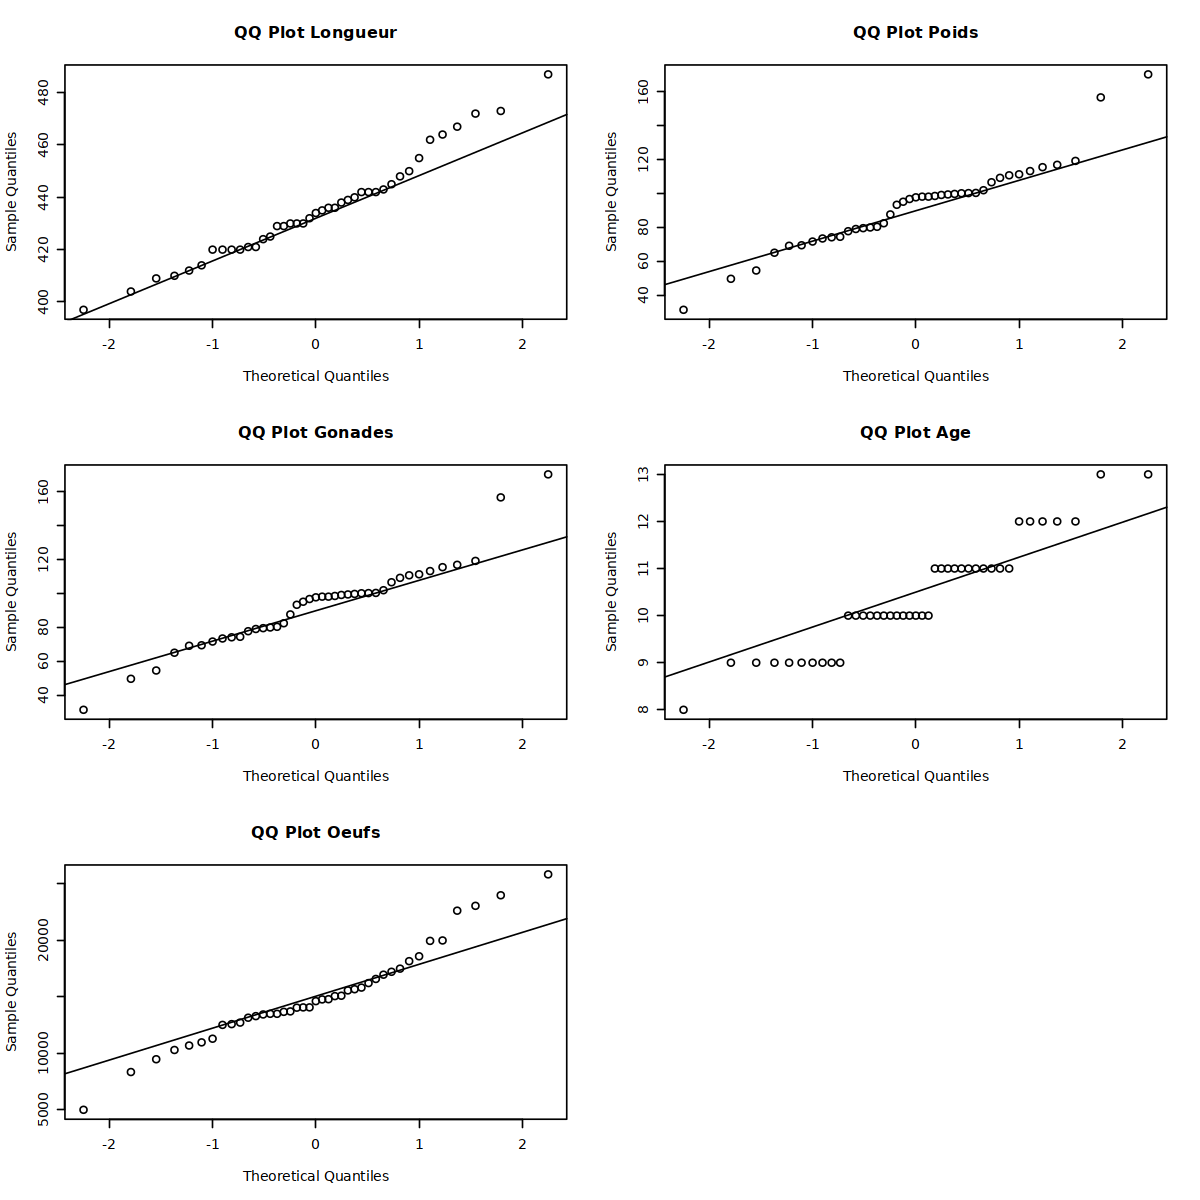

In [89]:
## Code cell n°70 ##
opar <- par()
par(mfrow = c(3, 2))
qqnorm(coregone$longueur_mm,main="QQ Plot Longueur")
qqline(coregone$longueur_mm)
qqnorm(coregone$poids_g,main="QQ Plot Poids")
qqline(coregone$poids_g)
qqnorm(coregone$poids_gonades_mg,main="QQ Plot Gonades")
qqline(coregone$poids_gonades_mg)
qqnorm(coregone$age_annee,main="QQ Plot Age")
qqline(coregone$age_annee)
qqnorm(coregone$oeufs_nombre,main="QQ Plot Oeufs")
qqline(coregone$oeufs_nombre)            
suppressWarnings(par(opar))

Pour aller plus loin, on peut tester la normalité de la distribution avec le test de Shapiro :

In [90]:
## Code cell n°71 ##
shapiro.test(coregone$longueur_mm)


	Shapiro-Wilk normality test

data:  coregone$longueur_mm
W = 0.97165, p-value = 0.3896


In [91]:
## Code cell n°72 ##
shapiro.test(coregone$poids_g)


	Shapiro-Wilk normality test

data:  coregone$poids_g
W = 0.93983, p-value = 0.031


In [92]:
## Code cell n°73 ##
shapiro.test(coregone$poids_gonades_mg)


	Shapiro-Wilk normality test

data:  coregone$poids_gonades_mg
W = 0.93983, p-value = 0.031


In [93]:
## Code cell n°74 ##
shapiro.test(coregone$age_annee)


	Shapiro-Wilk normality test

data:  coregone$age_annee
W = 0.92799, p-value = 0.01239


In [94]:
## Code cell n°75 ##
shapiro.test(coregone$oeufs_nombre)


	Shapiro-Wilk normality test

data:  coregone$oeufs_nombre
W = 0.96143, p-value = 0.1765


---
__2. Comparaison des potentiels reproducteurs selon l’âge :__

Existe-t-il une différence du nombre d’œufs produits entre les poissons jeunes (âge inférieur à 10 ans) et âgés (âge supérieur ou égal à 10)?

- Créez une nouvelle variable qualitative pour identifier les deux groupes : les individus `jeunes` et les individus `âgés`

_Fonction recommandées:_
`which()` ou `subset()`

In [95]:
## Code cell n°76 ##
coregone$classe_age <- NA
coregone[which(coregone[,4] <= 10),"classe_age"] <- "jeune"
coregone[which(coregone[,4] > 10),"classe_age"] <- "vieux" 

In [96]:
## Code cell n°76.2 ##
table(coregone$classe_age)


jeune vieux 
   23    18 

- Représentez la distribution de la variable œufs en fonction de la variable âge.
    
_Fonctions recommandées_
        `boxplot()`, `stripchart()`

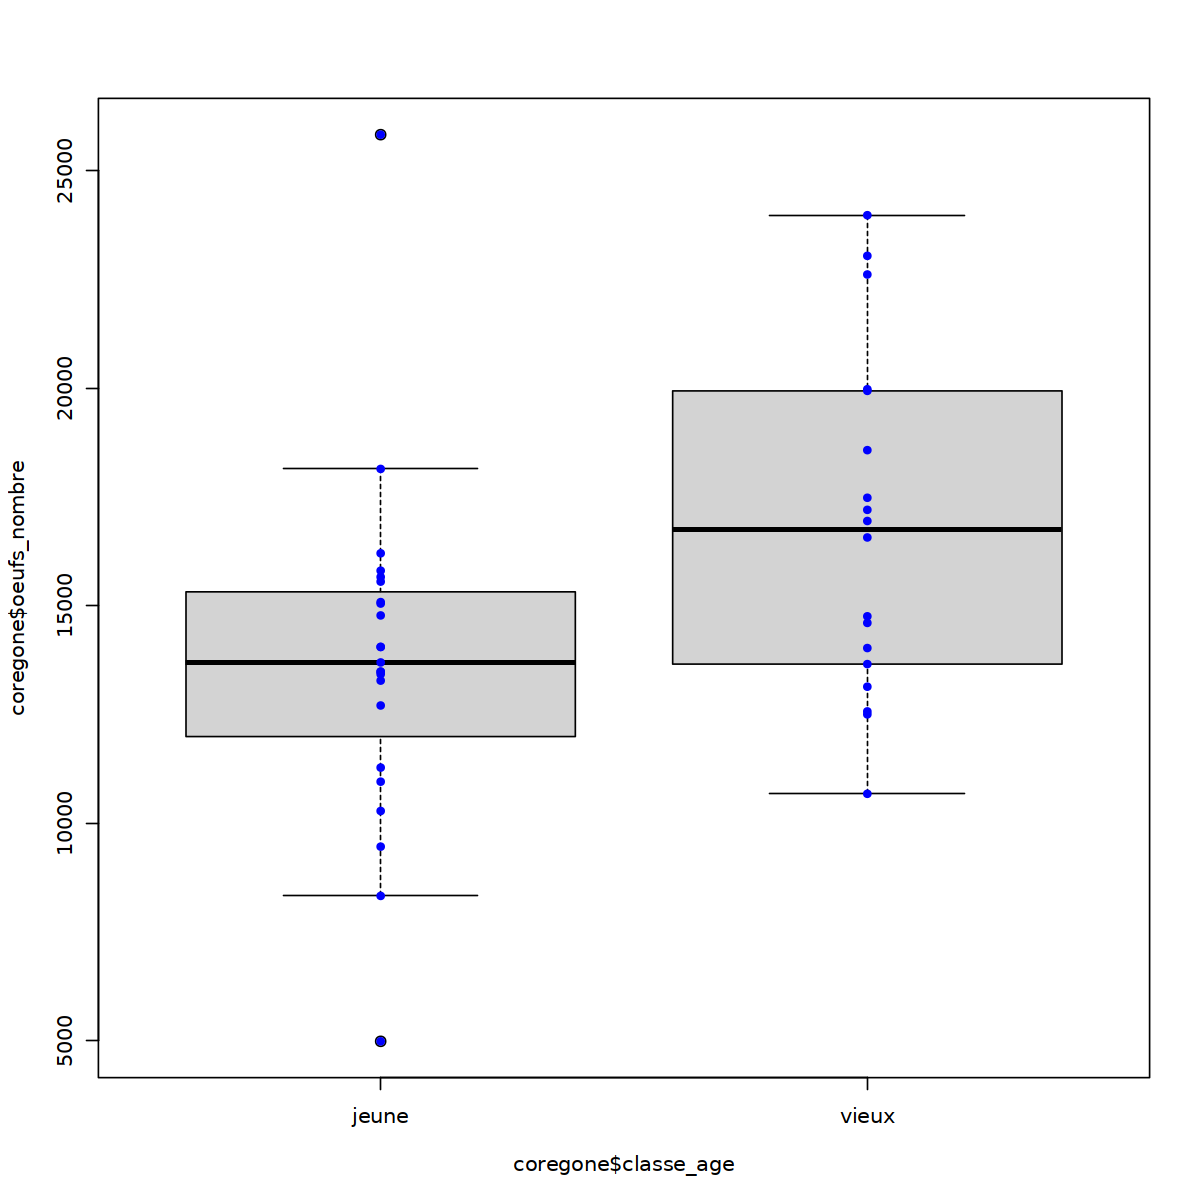

In [97]:
## Code cell n°77##
boxplot(coregone$oeufs_nombre ~ coregone$classe_age) 
stripchart(coregone$oeufs_nombre ~ coregone$classe_age, col = "blue", add = TRUE, vertical = TRUE, pch = 20) 

*__Pour aller plus loin:__*

On peut extraire les données du boxplot sans le tracer :
ex avec la commande ci-dessus qui permet d'extraire les stats, c'est à dire les valeurs correspondant au dessin de la boîte à moustache.


In [98]:
## Code cell n°77.2 ##
print(boxplot(coregone$oeufs_nombre~coregone$classe_age, plot=F)$stats)

        [,1]    [,2]
[1,]  8328.0 10676.0
[2,] 11993.0 13659.0
[3,] 13697.0 16760.5
[4,] 15320.5 19942.0
[5,] 18147.0 23982.0


En plus: representation des donnees par âge

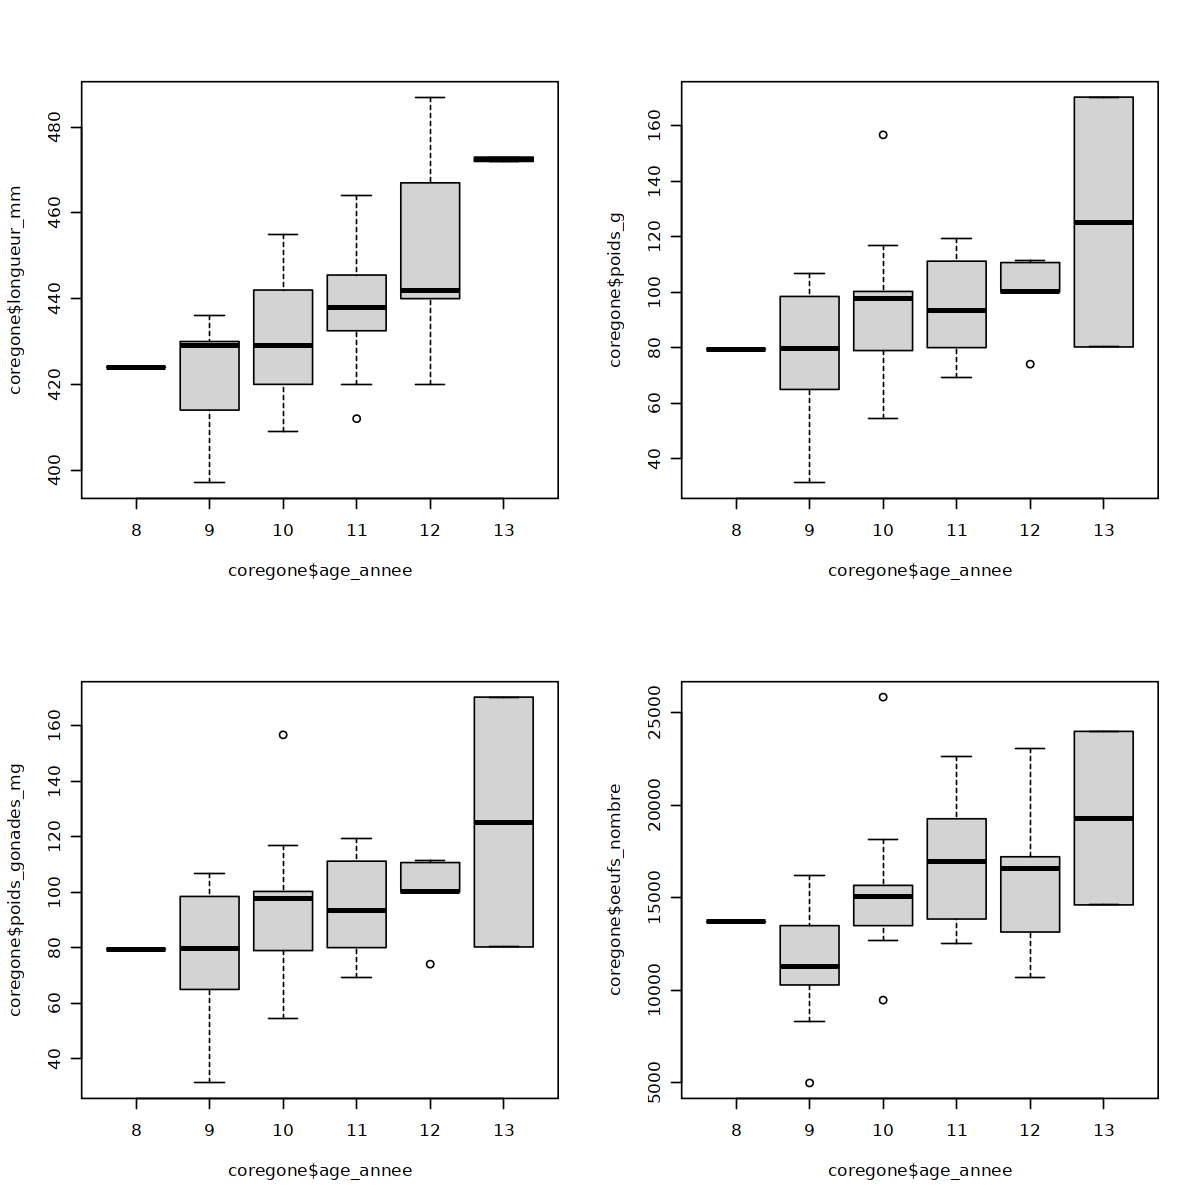

In [99]:
## Code cell n°77.3 ##
opar <- par()
par(mfrow=c(2,2))
boxplot(coregone$longueur_mm~coregone$age_annee) 
boxplot(coregone$poids_g~coregone$age_annee)
boxplot(coregone$poids_gonades_mg~coregone$age_annee)
boxplot(coregone$oeufs_nombre~coregone$age_annee)
suppressWarnings(par(opar))

- Calculez les moyennes dans chaque groupe du nombre d’œufs
    
_Fonctions recommandées:_
        `tapply()`, `mean()`


In [100]:
## Code cell n°78 ##
tapply(coregone$oeufs_nombre, coregone$classe_age, mean, na.rm = TRUE)

jeune    vieux 
13721.83 16794.39

Mieux que `apply()` ici, la fonction `tapply()` ci-dessus permet d'appliquer une fonction comme la moyenne en fonction d'une variable catégorique prise comme un facteur

In [102]:
## Code cell n°78.2 ##
# ou par vecteur en deux lignes:
mean(coregone$oeufs_nombre[which(coregone$classe_age == "jeune")])
mean(subset(coregone, classe_age == "vieux")$oeufs_nombre) # ou ici avec subset au lieu de which

[1] 13721.83

[1] 16794.39

- Existe-t-il une différence entre ces moyennes ?
    
_Fonctions recommandées:_
        `t.test()`, `wilcox.test()`

In [103]:
## Code cell n°79 ##
t.test(coregone$oeufs_nombre~coregone$classe_age)


	Welch Two Sample t-test

data:  coregone$oeufs_nombre by coregone$classe_age
t = -2.4862, df = 36.672, p-value = 0.01759
alternative hypothesis: true difference in means between group jeune and group vieux is not equal to 0
95 percent confidence interval:
 -5577.3332  -567.7924
sample estimates:
mean in group jeune mean in group vieux 
           13721.83            16794.39 


In [107]:
## Code cell n°80 ##
wilcox.test(coregone$oeufs_nombre~coregone$classe_age)

Warning message in wilcox.test.default(x = DATA[[1L]], y = DATA[[2L]], ...):
"cannot compute exact p-value with ties"



	Wilcoxon rank sum test with continuity correction

data:  coregone$oeufs_nombre by coregone$classe_age
W = 124, p-value = 0.0302
alternative hypothesis: true location shift is not equal to 0


- Existe-t-il une relation linéaire entre le poids des gonades et le nombre d’oeufs produits ?
   
_Fonctions recommandées:_
        `plot()`,
        `cor()`,
        `lm()`,
        `cor.test()`


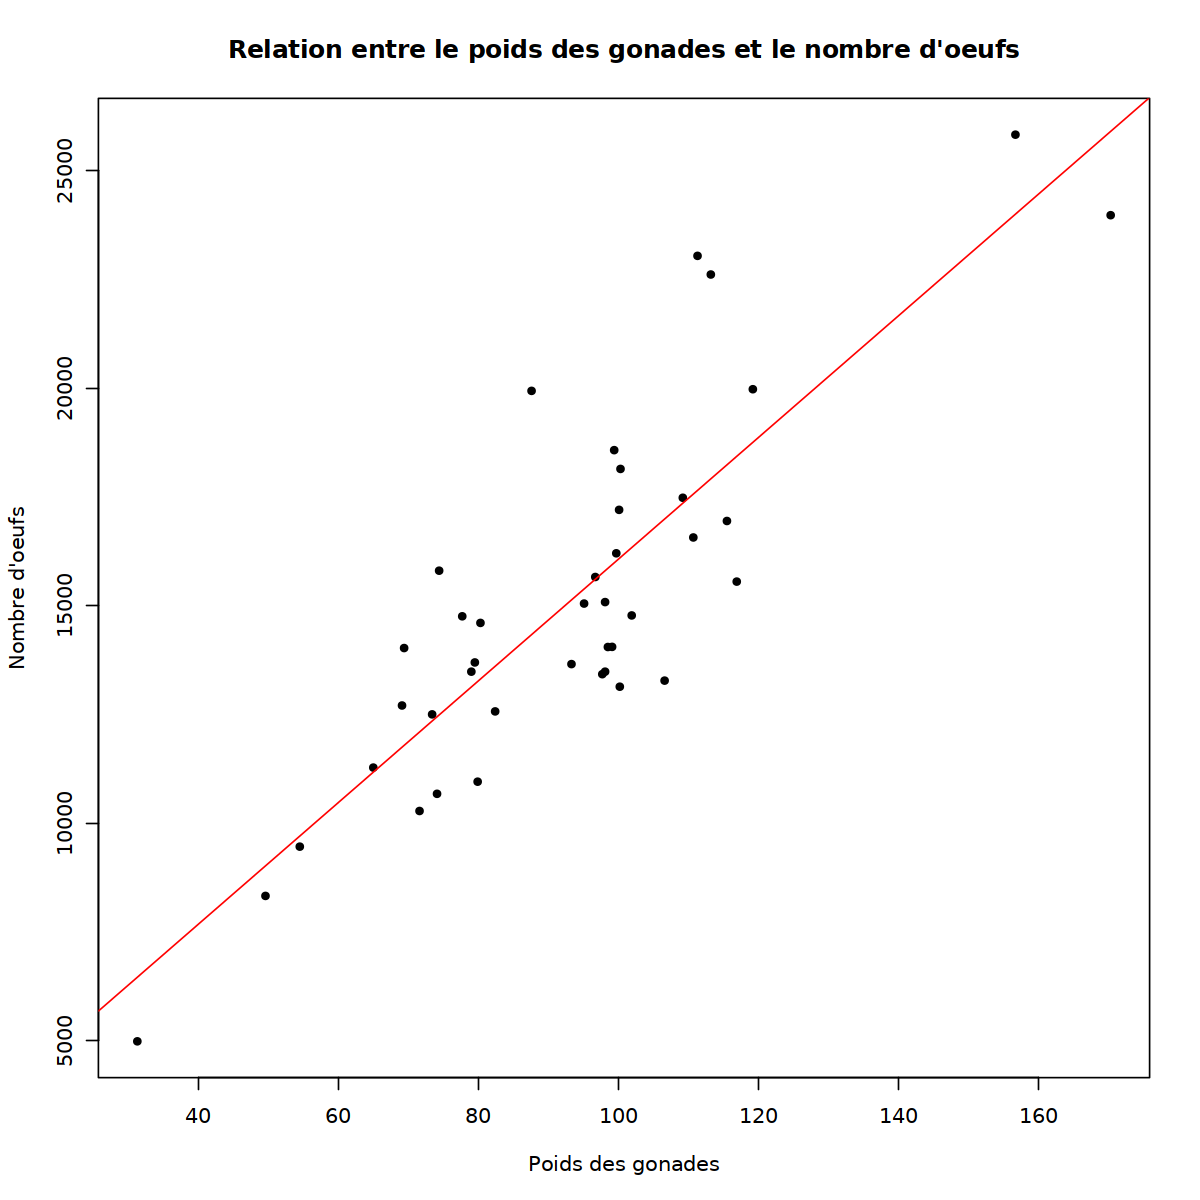

In [108]:
## Code cell n°81 ##
plot(coregone$oeufs_nombre ~ coregone$poids_gonades_mg, xlab = "Poids des gonades", ylab = "Nombre d'oeufs",pch = 20, main = "Relation entre le poids des gonades et le nombre d'oeufs")
abline(lm(coregone$oeufs_nombre ~ coregone$poids_gonades_mg),col="red")

In [109]:
## Code cell n°82 ##
cor.test(coregone$oeufs_nombre, coregone$poids_gonades_mg)


	Pearson's product-moment correlation

data:  coregone$oeufs_nombre and coregone$poids_gonades_mg
t = 9.9292, df = 39, p-value = 3.128e-12
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7285804 0.9156779
sample estimates:
      cor 
0.8464914 


In [110]:
## Code cell n°83 ##
summary(lm(coregone$oeufs_nombre ~ coregone$poids_gonades_mg))


Call:
lm(formula = coregone$oeufs_nombre ~ coregone$poids_gonades_mg)

Residuals:
   Min     1Q Median     3Q    Max 
 -3717  -1772   -244   1221   5605 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)                2078.30    1354.89   1.534    0.133    
coregone$poids_gonades_mg   139.94      14.09   9.929 3.13e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2250 on 39 degrees of freedom
Multiple R-squared:  0.7165,	Adjusted R-squared:  0.7093 
F-statistic: 98.59 on 1 and 39 DF,  p-value: 3.128e-12


__Conclusion__

Que pouvez-vous conclure quant à l'âge des poissons et la production des oeufs ?

=> Les poissons âgés ont tendance à pondre plus d’oeufs que les jeunes, ce qui est en relation avec le poids de leurs gonades

*Vous pouvez ensuite tester l’effet d’autres variables sur la variable « oeufs ».*

<div class="alert alert-block alert-success"><b>Success:</b> Well done! You have seen how to draw basic plots and run simple statistics with R base.

</div>


---
___

## Conclusion

---

Now we go on with a first exploratory analysis of counts, before normalisation.  
  
**=> Step 8: Exploratory analysis of counts** 

The jupyter notebook used for the next session will be *Pipe_08-R_counts-exploratory-analysis-I.ipynb*    
Let's retrieve it in our directory, in order to have a private copy to work on:   

In [114]:
## Code cell 84 ##   

myfolder <- getwd()

#myfolder <- setwd('/shared/ifbstor1/projects/2413_rnaseq_cea/mylogin') # devrait être inutile
#myfolder

file.copy("/shared/projects/2413_rnaseq_cea/staff/Pipe_08-R_counts-exploratory-analysis-I.ipynb", myfolder)

[1] FALSE



**Save executed notebook**

To end the session, save your executed notebook in your `run_notebooks` folder. **Adjust the name with yours** and reformat as code cell to run it.

---

<div class="alert alert-block alert-success"><b>Success:</b> Well done! You now know all the main functions to create and manipulate basic R objects.<br>
Don't forget to save you notebook and export a copy as an <b>html</b> file as well <br>
- Open "File" in the Menu<br>
- Select "Export Notebook As"<br>
- Export notebook as HTML<br>
- You can then open it in your browser even without being connected to the server! 
</div>

## Useful commands
<div class="alert alert-block alert-info"> 
    
- <kbd>CTRL</kbd>+<kbd>S</kbd> : save notebook<br>    
- <kbd>CTRL</kbd>+<kbd>ENTER</kbd> : Run Cell<br>  
- <kbd>SHIFT</kbd>+<kbd>ENTER</kbd> : Run Cell and Select Next<br>   
- <kbd>ALT</kbd>+<kbd>ENTER</kbd> : Run Cell and Insert Below<br>   
- <kbd>ESC</kbd>+<kbd>y</kbd> : Change to *Code* Cell Type<br>  
- <kbd>ESC</kbd>+<kbd>m</kbd> : Change to *Markdown* Cell Type<br> 
- <kbd>ESC</kbd>+<kbd>r</kbd> : Change to *Raw* Cell Type<br>    
- <kbd>ESC</kbd>+<kbd>a</kbd> : Create Cell Above<br> 
- <kbd>ESC</kbd>+<kbd>b</kbd> : Create Cell Below<br> 

<em>  
To make nice html reports with markdown: <a href="https://dillinger.io/" title="dillinger.io">html visualization tool 1</a> or <a href="https://stackedit.io/app#" title="stackedit.io">html visualization tool 2</a>, <a href="https://www.tablesgenerator.com/markdown_tables" title="tablesgenerator.com">to draw nice tables</a>, and the <a href="https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd" title="Ultimate guide">Ultimate guide</a>. <br>
Further reading on JupyterLab notebooks: <a href="https://jupyterlab.readthedocs.io/en/latest/user/notebook.html" title="Jupyter Lab">Jupyter Lab documentation</a>.<br>   
</em>    
 
</div>

Claire Vandiedonck - 2021-2022   
Sandrine Caburet - 05/2023   
MAJ : 16/06/2024 by @SCaburet